## Objectives:

- Lending club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. . 

- We need to identify the risky loan applicants so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [1]:
# importing libariries required
import pandas as pd
import numpy as np
import jovian
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the csv file(data_set)
data = pd.read_csv("loan.csv",dtype={'column_name': str})
data.shape

C:\Users\Parag Garg\AppData\Local\Temp\ipykernel_64924\477468745.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan.csv",dtype={'column_name': str})


(39717, 111)

## Data Understanding:

In [3]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

There are 110 columns/variables in the data set covering various details about the loan applications & repayment<br>
<br>
The Variables can be broadly classified into 3 categories:<br>
1) Applicant Details : Aplicant's information such as "Annual Income", "Employment Length', "Address", "Home Owned Status" etc.<br>
2) Loan Details: Loan application information such as "Loan Amount", "Interest Rate", "Grade", "Term" etc. <br>
3) Customer Behaviour Details: Variables describing customer behaviour on repayment after the loan is sanctioned such as"Pub-rec", "Last Payment Date", "Next Payment Date", "Recoveries" etc. <br>
<br>
As per the Objective of the study we need to focus on variables that help us identify loan can be defaulted before sanction thus we would be focusing more on "Applicant Details" & "Loan Details" Variables

## Data Cleaning:

Data set given consists of Empty Columns, Null Values, Columns with same value for all observations<br>
We need to delete/impound the data to receive a clear data set for analysi

In [4]:
# Checking number of null columns present in the dataset

null_columns  = pd.DataFrame(data.isnull().all()).reset_index()
null_columns = null_columns[null_columns[0] == True]
len(null_columns)

54

In [5]:
# Dropping the null columns

df = data.dropna(axis = 1, how ='all') 
len(df.columns)

57

In [6]:
#Null Value Treatment : Dropping coumns with majjority of null values

missing = round(100*(df.isnull().sum()/len(df.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

'mths_since_last_delinq', 'mths_since_last_record ', 'next_pymnt_d' columns needs to be deleted as most of the values are null<br>
65%, 93%, 97% (approx) respectively<br>

Column 'desc' tells about the description of the loan application(purpose) as this information is not of much valu to our analysis & it has 32% null data we can drop it<br>
We already have 'purpose' column with categories of loan purpose, also impounding in 'desc' is not possible

In [7]:
# Dropping columns

df = df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc'],axis =1 )
print(len(df.columns))

53


In [8]:
# Dropping columns with all values as "0", "NaN", "Same Value for all"

print(df['chargeoff_within_12_mths'].unique())
print(df['collections_12_mths_ex_med'].unique())
print(df['tax_liens'].unique())
print(df['acc_now_delinq'].unique())
print(df['delinq_amnt'].unique())
print(df['application_type'].unique())
print(df['initial_list_status'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]
[0]
[0]
['INDIVIDUAL']
['f']


In [9]:
df = df.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','acc_now_delinq','delinq_amnt','application_type','initial_list_status'],axis =1 )
print(len(df.columns))

46


In [10]:
# Null Value Treatment: Checking the no. of rows i each column having null values

missing = round(100*(df.isnull().sum()/len(df.id)), 2)
missing[missing != 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [11]:
# Deleting rows having null values

df=df[~df.emp_title.isnull()]
df=df[~df.emp_length.isnull()]
df=df[~df.title.isnull()]
df=df[~df.revol_util.isnull()]
df=df[~df.last_pymnt_d.isnull()]
df=df[~df.pub_rec_bankruptcies.isnull()]

In [12]:
missing = round(100*(df.isnull().sum()/len(df.id)), 2)
missing[missing != 0]

Series([], dtype: float64)

In [13]:
df.shape

(36433, 46)

After all null values are treated we are still left with 36433 observations which is more than 90% of the total<br>
Thus we have a haelthy data set to analyze

## Data Analysing:

<h3
    > Initial Analysis

As per the objective of the case study we need to identify the variables which can indicate whether a loan can be defaulted or not<br>
The observations with "loan_status" as "Current" does not help us decide that as they can go the either way --> "Fully Paid" or "Charged Off"<br>
Thus we will delete all observations with loan_status as Current in this analysis

In [14]:
# Deleting observations with loan_status as Current

df=df[~(df.loan_status=='Current')]

<h6>On Referring the Data Dictionary file,<br>


Many of the variables present in the dataset are related to activities post loan has been sanctioned or loan has been charged off, such vaiables can be dropped from this case study <br>
Refer below such variables:<br>
1)total_pymnt<br>
2)total_pymnt_inv<br>
3)total_rec_prncp<br>
4)total_rec_int<br>
5)total_rec_late_fee<br>
6)recoveries<br>
7)collection_recovery_fee	
8)last_pymnt_d	
9)last_pymnt_amnt	
10)last_credit_pull_d	
11)out_prncp	
12)out_prncp_inv

In [15]:
# Dropping Unneccessary columns from the data frame

df = df.drop(['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','out_prncp','out_prncp_inv'],axis =1 )
print(len(df.columns))

34


In [16]:
df.shape

(35367, 34)

## Univariate Analysis

We will perform Univariate Analysis on major columns to check which variables helps to identify Charged off loans

In [17]:
# Defining functions for repeatable tasks

def plot_box(df,colx,coly, title, xlab, ylab,xsize = 10, ysize = 6,col_hue = None):
    fig, ax1 = plt.subplots(figsize=(xsize,ysize))
    ax1.set_title(title, fontsize=16)
    ax1 = sns.boxplot(x=colx, y=coly, data=df,hue = col_hue)
    ax1.set_xlabel(str(xlab), fontsize=16)
    ax1.set_ylabel(str(ylab), fontsize=16)
    plt.show()
    
def plot_bar(df,colx,coly, title, xlab, ylab,xsize = 10, ysize = 6,col_hue = None):
    fig, ax1 = plt.subplots(figsize=(xsize,ysize))
    ax1.set_title(title, fontsize=16)
    ax1 = sns.barplot(x=colx, y=coly, data=df,hue=col_hue)
    ax1.set_xlabel(str(xlab), fontsize=16)
    ax1.set_ylabel(str(ylab), fontsize=16)
    plt.show()

def plot_dist(df, coll):
    fig, ax1 = plt.subplots(figsize=(10,6))
    ax1 = sns.distplot(df[coll])
    plt.show()

def plot_percent_charged_off_over_total(df,coll,title,xlab,ylab, xsize = 10, ysize = 6):
    a = df[df['loan_status'] == 'Charged Off'].groupby(coll).size().reset_index()
    a = a.rename(columns={0: "charged_off"})
    b = df.groupby(coll).size().reset_index()
    b = b.rename(columns={0: "total"})
    c= a.merge(b,on = coll, how = 'inner')
    c['fraction'] = round(100*(c['charged_off']/c['total']),2)
    c = c.reset_index()
    print(c)
    plot_bar(c,coll,'fraction',title,xlab,ylab,xsize,ysize)
    
def plot_percent_charged_off_over_total_charged_off(df,coll,title,xlab,ylab,xsize = 10, ysize = 6):
    a = df[df['loan_status'] == 'Charged Off'].groupby(coll).size().reset_index()
    b = a.rename(columns={0: "charged_off"})
    b['fraction'] = round(100*(b['charged_off']/len(df[df['loan_status'] == 'Charged Off'])),2)
    b = b.reset_index()
    print(b)
    plot_bar(b,coll,'fraction',title,xlab,ylab,xsize,ysize)

#### loan_amnt

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


   loan_status  loan_amnt
0  Charged Off       4943
1   Fully Paid      30424


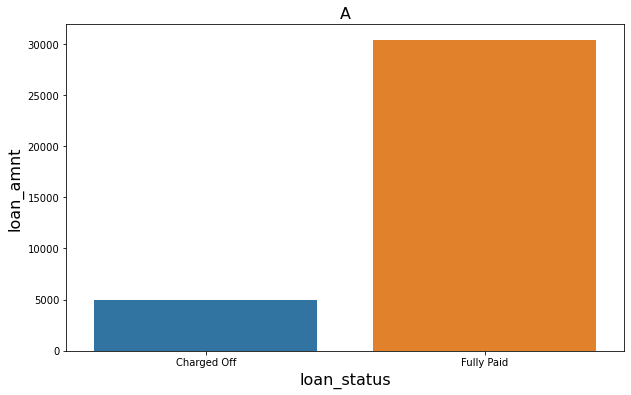

In [19]:
df_loan_amnt = df.groupby('loan_status').loan_amnt.count().reset_index()
print(df_loan_amnt)
plot_bar(df_loan_amnt,'loan_status','loan_amnt','A','loan_status','loan_amnt')

C:\Users\Parag Garg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


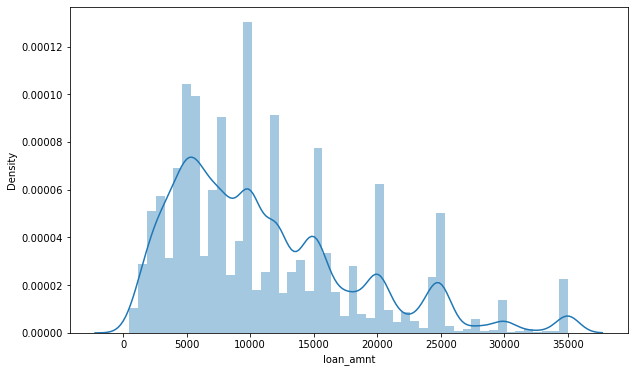

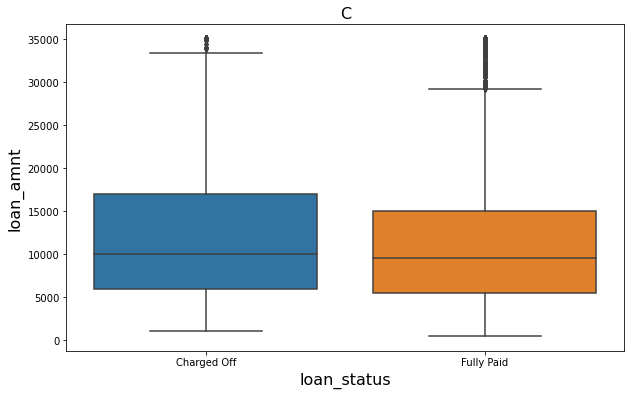

In [20]:
plot_dist(df,'loan_amnt')
plot_box(df,'loan_status','loan_amnt','C','loan_status','loan_amnt')



Weird increase in number of loan at 5000 multiples.
Charged-off loans are have higher average than fully paid.
Right Skewed

In [21]:
def loan_amnt_bins(x):
    if x <= 5000:
        return '0k-5k'
    elif (x> 5000) & (x <= 10000) :
        return '5k-10k'
    elif (x> 10000) & (x <= 15000) :
        return '10k-15k'
    elif (x> 15000) & (x <= 20000) :
        return '15k-20k'
    elif (x> 20000) & (x <= 25000) :
        return '20k-25k'
    elif (x> 25000) & (x <= 30000) :
        return '25k-30k'
    elif (x> 30000) & (x <= 35000) :
        return '30k-35k'
    
df['loan_amnt_bins'] = df['loan_amnt'].apply(lambda x: loan_amnt_bins(x))

   index loan_amnt_bins  charged_off  total  fraction
0      0          0k-5k         1095   8432     12.99
1      1        10k-15k          946   7200     13.14
2      2        15k-20k          687   4059     16.93
3      3        20k-25k          478   2599     18.39
4      4        25k-30k          134    661     20.27
5      5        30k-35k          160    668     23.95
6      6         5k-10k         1443  11748     12.28


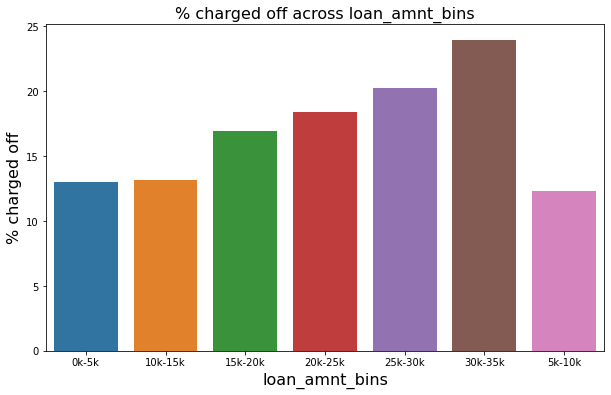

In [22]:
plot_percent_charged_off_over_total(df,'loan_amnt_bins','% charged off across loan_amnt_bins','loan_amnt_bins','% charged off')

% percentage of charged off loans increases as the loan amount increases.

#### Term

[' 60 months' ' 36 months']


<AxesSubplot:xlabel='term'>

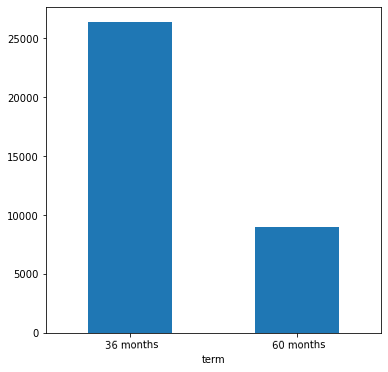

In [23]:
print(df['term'].unique())
df_term_count = df.groupby('term').size()
plt.subplots(figsize=(6,6))
df_term_count.plot.bar(rot=1)

In [24]:
df['term_months'] = df['term'].apply(lambda x: int(str(x).split(' ')[1]))

   index  term_months  charged_off  total  fraction
0      0           36         2730  26377     10.35
1      1           60         2213   8990     24.62


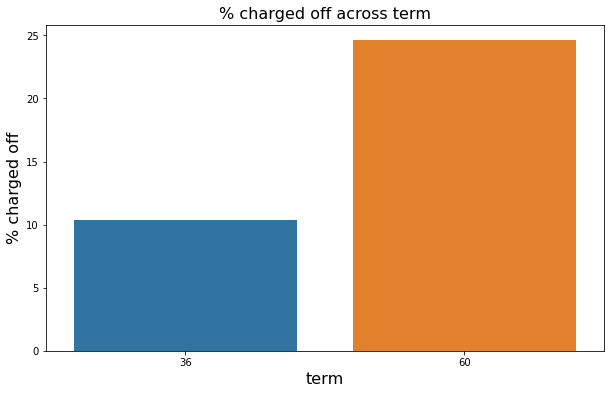

In [25]:
plot_percent_charged_off_over_total(df,'term_months','% charged off across term','term','% charged off')

Number of 3 year loans is very high compared to 5 years. 5 years loan get more prone to getting charged-off.

#### Int_rate

               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   4943.0  13.929828  3.647619  5.42  11.49  13.79  16.45  24.40
Fully Paid   30424.0  11.667243  3.613734  5.42   8.59  11.49  14.09  24.11


C:\Users\Parag Garg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


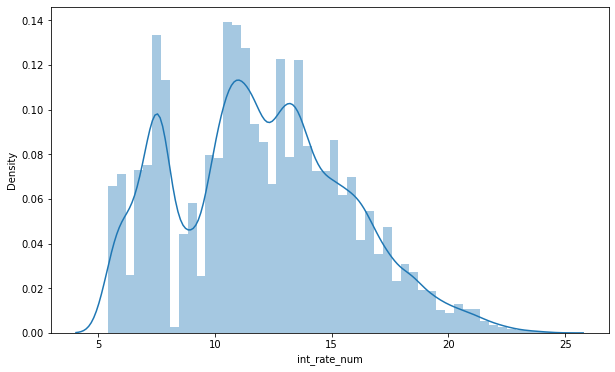

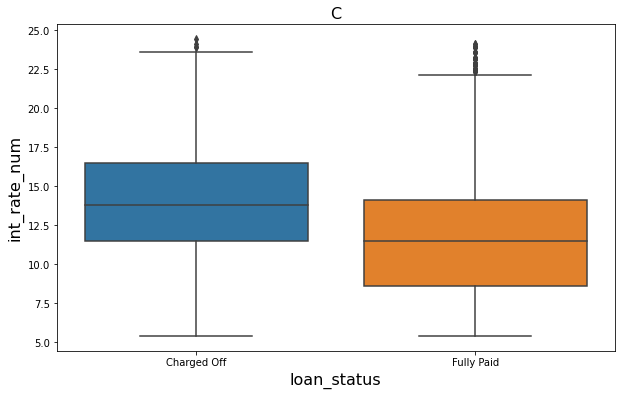

In [26]:
df['int_rate_num'] = df['int_rate'].apply(lambda x: float(x.replace('%','')))
print(df.groupby('loan_status')['int_rate_num'].describe())
plot_dist(df,'int_rate_num')
plot_box(df,'loan_status','int_rate_num','C','loan_status','int_rate_num')

    index  int_rate_num_bin  charged_off  total  fraction
0       0               5.0           13    505      2.57
1       1               6.0           43   1392      3.09
2       2               7.0          160   2997      5.34
3       3               8.0          201   3037      6.62
4       4               9.0           96   1313      7.31
5       5              10.0          302   3034      9.95
6       6              11.0          525   4520     11.62
7       7              12.0          410   2829     14.49
8       8              13.0          642   4274     15.02
9       9              14.0          426   2638     16.15
10     10              15.0          438   2348     18.65
11     11              16.0          519   2466     21.05
12     12              17.0          335   1313     25.51
13     13              18.0          274   1036     26.45
14     14              19.0          218    735     29.66
15     15              20.0          140    414     33.82
16     16     

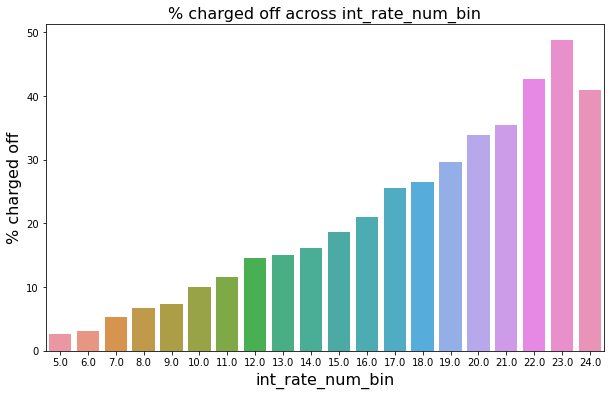

In [27]:
df['int_rate_num_bin'] = round(df['int_rate_num'])

plot_percent_charged_off_over_total(df,'int_rate_num_bin','% charged off across int_rate_num_bin','int_rate_num_bin','% charged off')

Interest rate for charged off seems higher than for fully paid.
And as the interest rate increases the percentage of charged off also increases.

#### Installment

               count        mean         std    min       25%     50%  \
loan_status                                                             
Charged Off   4943.0  338.848452  214.527655  22.79  172.4350  298.33   
Fully Paid   30424.0  321.638693  205.828423  16.08  167.2975  278.24   

                  75%      max  
loan_status                     
Charged Off  458.3150  1305.19  
Fully Paid   422.3075  1295.21  


C:\Users\Parag Garg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


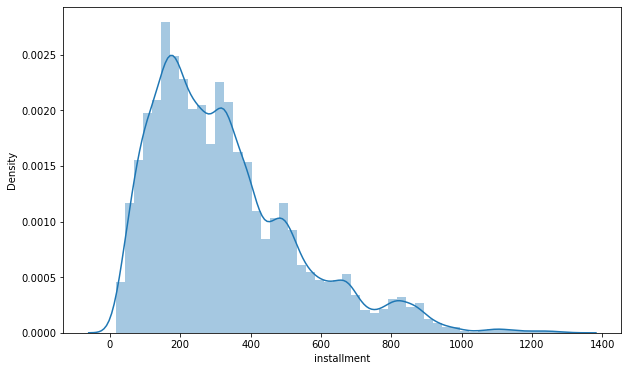

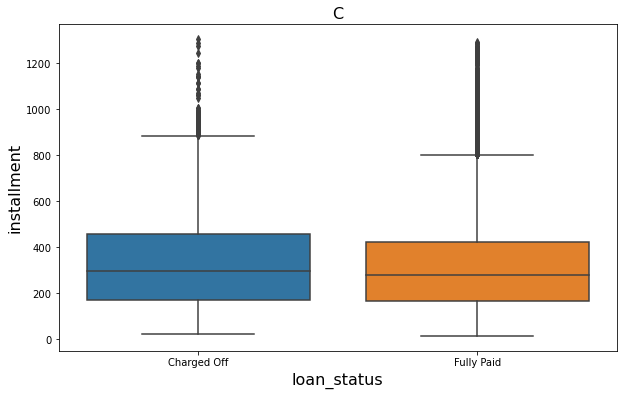

In [28]:
print(df.groupby('loan_status')['installment'].describe())
plot_dist(df,'installment')
plot_box(df,'loan_status','installment','C','loan_status','installment')

Average installments value is higher for charged off than fully paid

#### Grade and sub_grade

['C' 'A' 'E' 'B' 'D' 'F' 'G']


<AxesSubplot:xlabel='grade'>

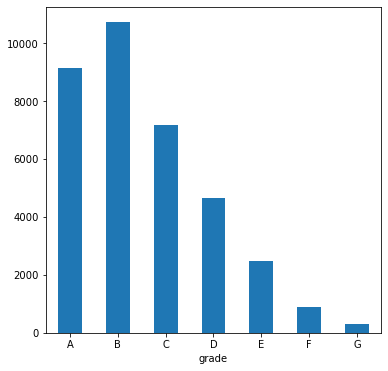

In [29]:
print(df['grade'].unique())
df_grade_count = df.groupby('grade').size()
plt.subplots(figsize=(6,6))
df_grade_count.plot.bar(rot=1)

   index grade  charged_off  total  fraction
0      0     A          513   9140      5.61
1      1     B         1253  10718     11.69
2      2     C         1170   7181     16.29
3      3     D          980   4663     21.02
4      4     E          648   2481     26.12
5      5     F          286    902     31.71
6      6     G           93    282     32.98


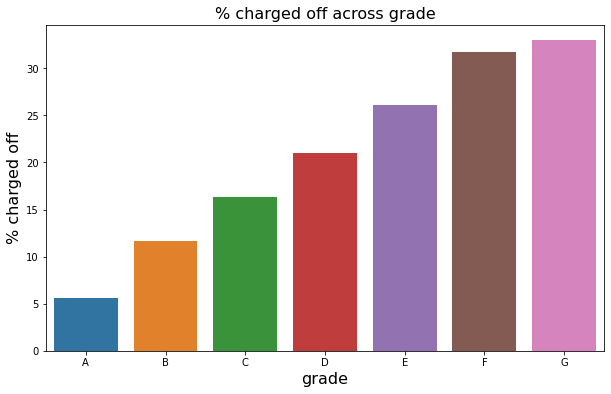

In [30]:
plot_percent_charged_off_over_total(df,'grade','% charged off across grade','grade','% charged off')

Loans of grades A,B,C are having the highest frequency.
Loans grades A,B are having the lowest % of charged-off cases.
Other grades like E,F,G are facing large charge offs.

['C4' 'C1' 'A4' 'C5' 'E1' 'B5' 'C3' 'B1' 'B2' 'D1' 'A1' 'B3' 'B4' 'D2'
 'A5' 'A3' 'A2' 'E4' 'D3' 'C2' 'F2' 'D4' 'F3' 'E3' 'F1' 'D5' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']


<AxesSubplot:xlabel='sub_grade'>

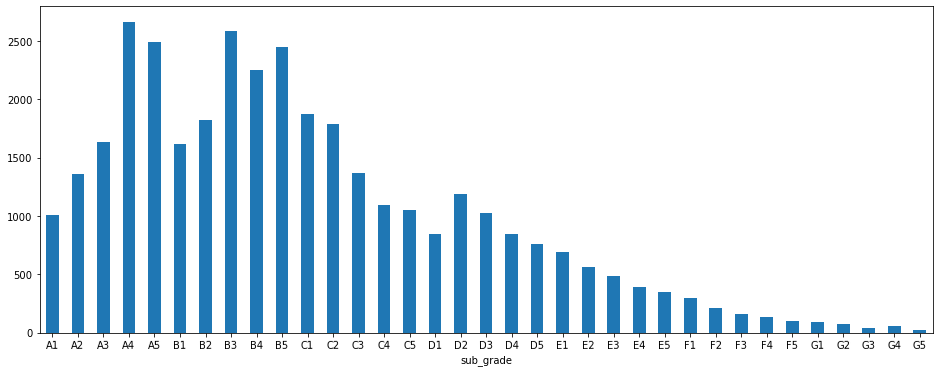

In [31]:
print(df['sub_grade'].unique())
df_grade_count = df.groupby('sub_grade').size()
plt.subplots(figsize=(16,6))
df_grade_count.plot.bar(rot=1)

A,B are with the highest frequency

#### Emp_length

In [32]:
print(df['emp_length'].unique())
df_emp_length_count = df.groupby('emp_length').size()

df_emp_length_count = df_emp_length_count.reset_index()
df_emp_length_count = df_emp_length_count.loc[[10,0,2,3,4,5,6,7,8,9,1]]
df_emp_length_count = df_emp_length_count.reset_index()

print(df_emp_length_count)

['< 1 year' '10+ years' '3 years' '8 years' '9 years' '5 years' '4 years'
 '1 year' '6 years' '2 years' '7 years']
    index emp_length     0
0      10   < 1 year  3978
1       0     1 year  2959
2       2    2 years  4083
3       3    3 years  3833
4       4    4 years  3206
5       5    5 years  3043
6       6    6 years  2062
7       7    7 years  1638
8       8    8 years  1361
9       9    9 years  1176
10      1  10+ years  8028


<AxesSubplot:>

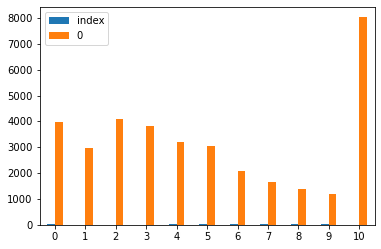

In [33]:
df_emp_length_count.plot.bar(rot=1)

    index emp_length  charged_off  fraction
0       0     1 year          408      8.25
1       1  10+ years         1233     24.94
2       2    2 years          529     10.70
3       3    3 years          521     10.54
4       4    4 years          427      8.64
5       5    5 years          422      8.54
6       6    6 years          287      5.81
7       7    7 years          248      5.02
8       8    8 years          191      3.86
9       9    9 years          147      2.97
10     10   < 1 year          530     10.72


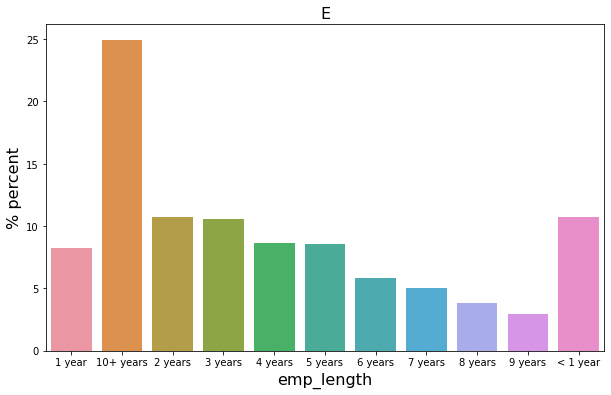

In [34]:
plot_percent_charged_off_over_total_charged_off(df,'emp_length','E','emp_length','% percent')

21.6 % loans taken are from people with 10 + years of emp_length.<br>
24.9 % of out these are charged_off

#### Home_ownership

<AxesSubplot:xlabel='home_ownership'>

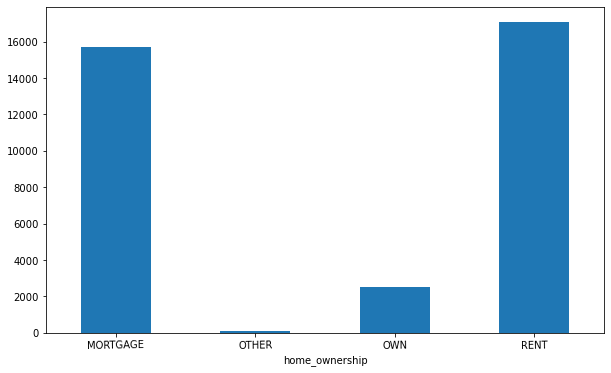

In [35]:
plt.subplots(figsize=(10,6))
df.groupby('home_ownership').size().plot.bar(rot=1)

   index home_ownership  charged_off  total  fraction
0      0       MORTGAGE         2062  15703     13.13
1      1          OTHER           18     94     19.15
2      2            OWN          346   2505     13.81
3      3           RENT         2517  17065     14.75


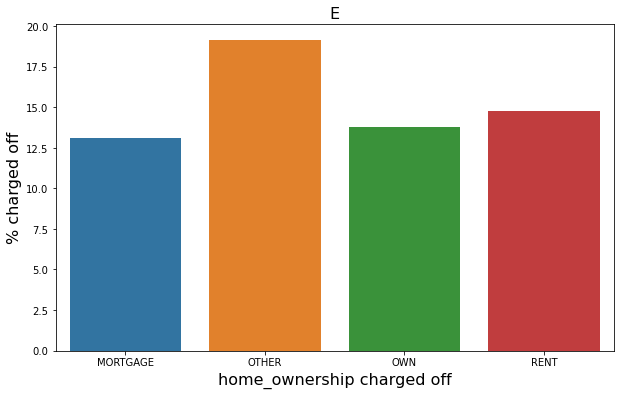

In [36]:
plot_percent_charged_off_over_total(df,'home_ownership','E','home_ownership charged off','% charged off')

   index home_ownership  charged_off  fraction
0      0       MORTGAGE         2062     41.72
1      1          OTHER           18      0.36
2      2            OWN          346      7.00
3      3           RENT         2517     50.92


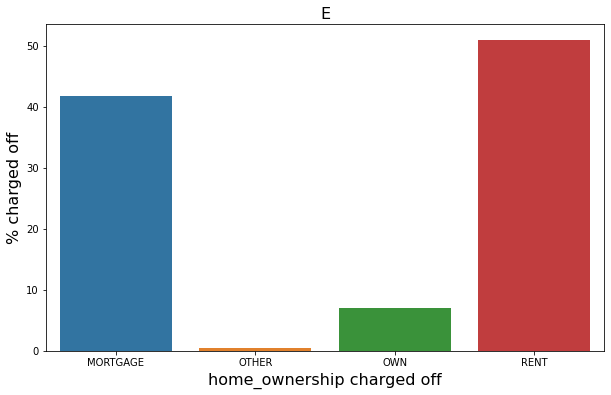

In [37]:
plot_percent_charged_off_over_total_charged_off(df,'home_ownership','E','home_ownership charged off','% charged off')

Charged off cases are higher for Home_Ownership type of Rent & Mortgage

#### Annual_inc

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


C:\Users\Parag Garg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


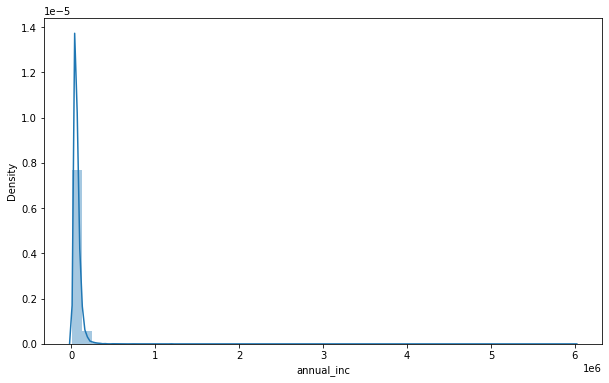

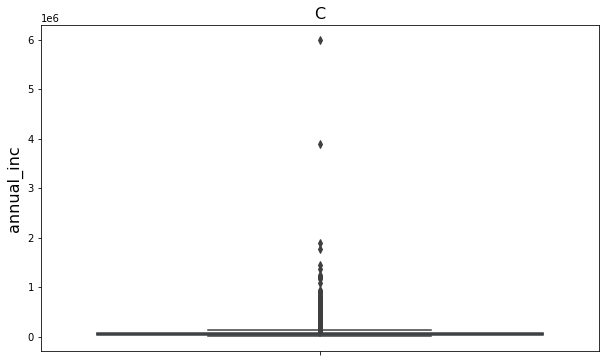

In [38]:
print(df['annual_inc'].describe())
plot_dist(df,'annual_inc')
plot_box(df,None,'annual_inc','C','','annual_inc')

Majority (99 %) of the annual income lies below 2.5 lacs, lets confirm

In [39]:
print('Annual income')
print("99 percentile", np.percentile(df['annual_inc'], 99, interpolation = 'midpoint'))
print("95 percentile", np.percentile(df['annual_inc'], 95, interpolation = 'midpoint'))
print("50 percentile", np.percentile(df['annual_inc'], 50, interpolation = 'midpoint'))
print("Min", np.percentile(df['annual_inc'], 0, interpolation = 'midpoint'))
print("Max", np.percentile(df['annual_inc'], 100, interpolation = 'midpoint'))

Annual income
99 percentile 230000.0
95 percentile 140000.0
50 percentile 60000.0
Min 4000.0
Max 6000000.0


Annual Income range is 4k to 39 lacs.<br>
95% of annual income is below 1.4 lacs.<br>
Removing outliers here is very important as these will bring bias in analysis. Lets remove outside the 3 std from our mean.<br>

In [40]:
df_income_clean = df[(df['annual_inc']-df['annual_inc'].mean()) <= (3*df['annual_inc'].std())]

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64


C:\Users\Parag Garg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


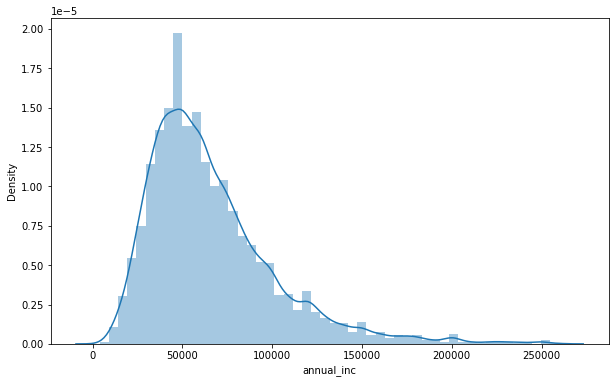

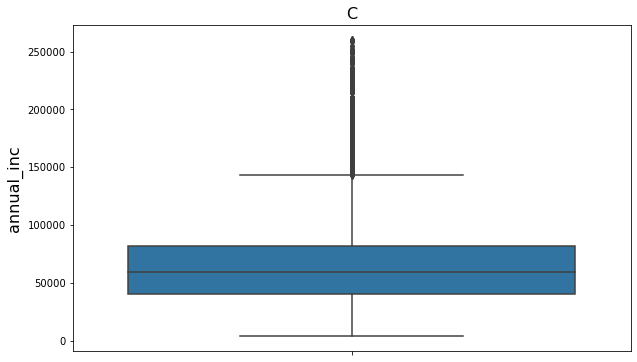

In [41]:
print(df_income_clean['annual_inc'].describe())
plot_dist(df_income_clean,'annual_inc')
plot_box(df_income_clean,None,'annual_inc','C','','annual_inc')

In [42]:
#We removed 192 outliers from top incomes
len(df)-len(df_income_clean)

245

In [43]:
df_income_clean['income_bin'] = pd.cut(df_income_clean['annual_inc'],
                                       [x for x in range(0, 310000, 10000)],
                                       labels=[str(x)+'k-'+str(x+10)+'k' for x in range (0, 300, 10)])
df_income_clean['income_bin'] = df_income_clean['income_bin'].astype(str)

C:\Users\Parag Garg\AppData\Local\Temp\ipykernel_64924\1982770364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_clean['income_bin'] = pd.cut(df_income_clean['annual_inc'],
C:\Users\Parag Garg\AppData\Local\Temp\ipykernel_64924\1982770364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_clean['income_bin'] = df_income_clean['income_bin'].astype(str)


In [44]:
df_income_clean_short = df_income_clean[['income_bin','loan_status']]

In [45]:
[0,2,13]+list(range(18,25))+[1]+list(range(3,13)) + list(range(14,18))

[0,
 2,
 13,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17]

    index income_bin  charged_off  total  fraction
0       0     0k-10k           13     54     24.07
1       1    10k-20k          149    824     18.08
2       2    20k-30k          510   2938     17.36
3       3  250k-260k            1     12      8.33
4       4    30k-40k          794   4671     17.00
5       5    40k-50k          763   5234     14.58
6       6    50k-60k          792   5220     15.17
7       7    60k-70k          501   3849     13.02
8       8    70k-80k          417   3314     12.58
9       9    80k-90k          280   2368     11.82
10     10  100k-110k          119   1162     10.24
11     11  110k-120k          105   1005     10.45
12     12  120k-130k           74    687     10.77
13     13  130k-140k           50    454     11.01
14     14  140k-150k           43    401     10.72
15     15  150k-160k           34    241     14.11
16     16  160k-170k           11    158      6.96
17     17  170k-180k           21    192     10.94
18     18  180k-190k           

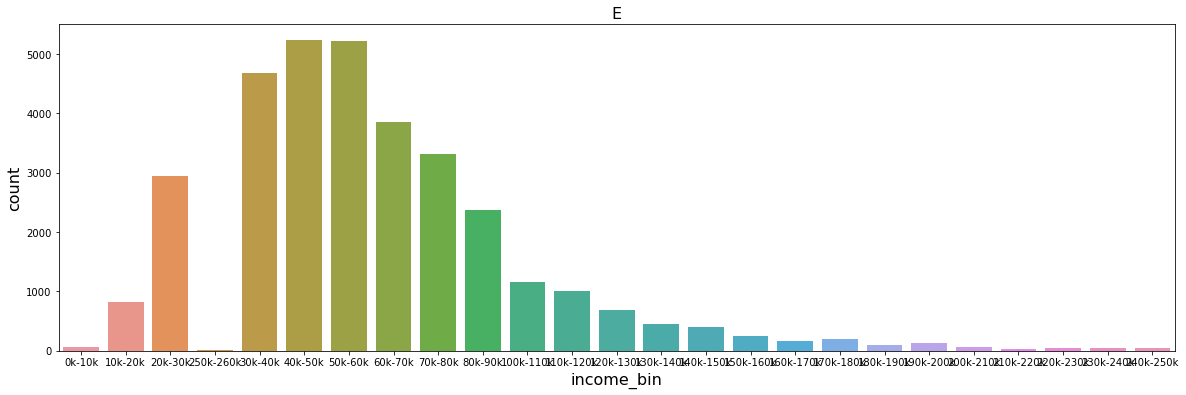

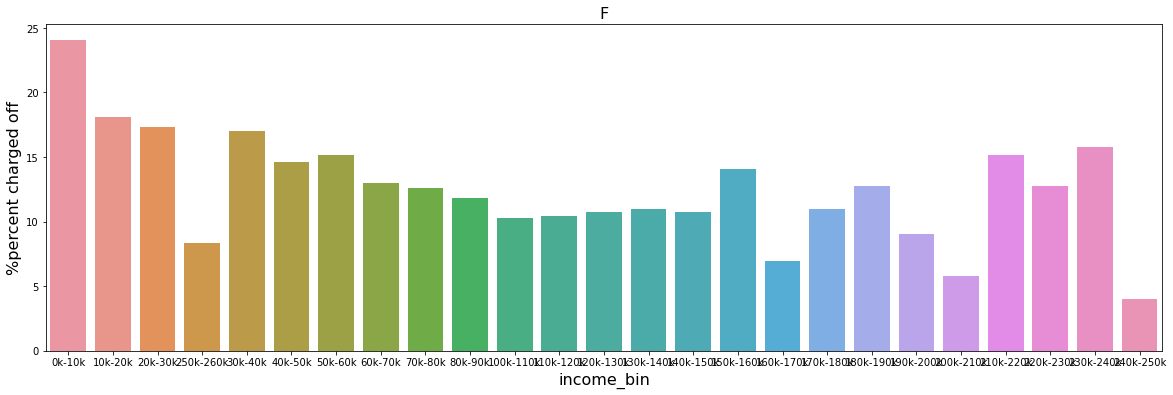

In [46]:
a = df_income_clean_short[df_income_clean_short['loan_status'] == 'Charged Off'].groupby('income_bin').size().reset_index()
a = a.rename(columns={0: "charged_off"})
a = a.loc[[0,2,13]+list(range(18,25))+[1]+list(range(3,13)) + list(range(14,18))]
b = df_income_clean_short.groupby('income_bin').size().reset_index()
b = b.rename(columns={0: "total"})
b = b.loc[[0,2,13]+list(range(18,25))+[1]+list(range(3,13)) + list(range(14,18))]
c= a.merge(b,on = 'income_bin', how = 'inner')
c['fraction'] = round(100*(c['charged_off']/c['total']),2)
c = c.reset_index()
print(c)
plot_bar(c,'income_bin','total','E','income_bin','count',20,6)
plot_bar(c,'income_bin','fraction','F','income_bin','%percent charged off',20,6)

Majority of loans are in the range of 20k - 100k. <br>
All these are 

#### Verification_status

<AxesSubplot:xlabel='verification_status'>

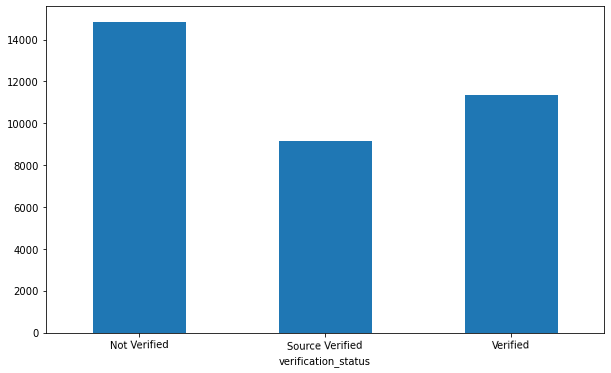

In [47]:
plt.subplots(figsize=(10,6))
df.groupby('verification_status').size().plot.bar(rot=1)

   index verification_status  charged_off  fraction
0      0        Not Verified         1770     35.81
1      1     Source Verified         1322     26.74
2      2            Verified         1851     37.45


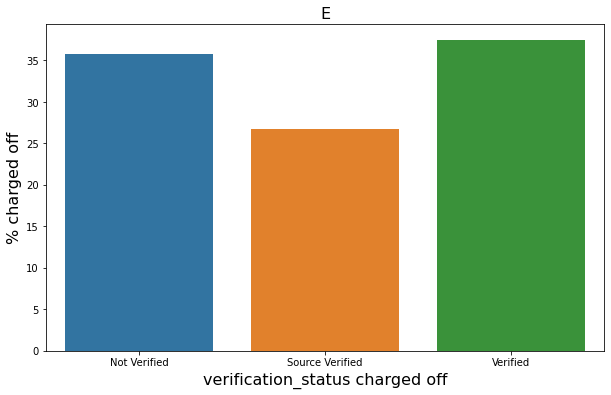

In [48]:
plot_percent_charged_off_over_total_charged_off(df,'verification_status','E','verification_status charged off','% charged off')

   index verification_status  charged_off  total  fraction
0      0        Not Verified         1770  14840     11.93
1      1     Source Verified         1322   9164     14.43
2      2            Verified         1851  11363     16.29


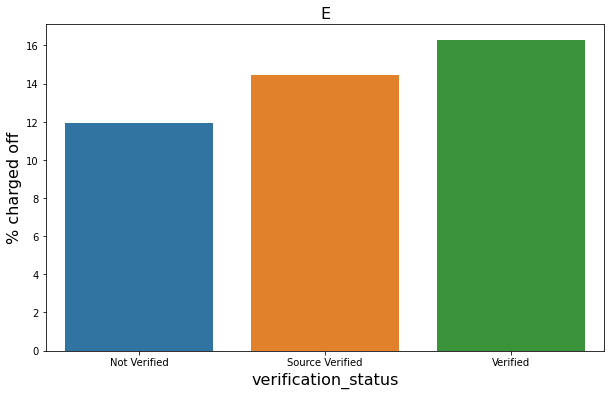

In [49]:
plot_percent_charged_off_over_total(df,'verification_status','E','verification_status','% charged off')

There are more number Non-verified number of loans than verified.<br>
Amongst charged-off loans percentage of verified is slightly higher than non-verified.

#### Issue_d

In [50]:
# lets convert the issue_d column into datetime type column.
df['issue_d_month'] = df['issue_d'].apply(lambda x: str(x).split('-')[0])
df['issue_d_year'] = df['issue_d'].apply(lambda x:  '19'+str(x).split('-')[1] if int(str(x).split('-')[1]) > 11 else '20'+str(x).split('-')[1]  )
df['issue_d_date'] = pd.to_datetime(df['issue_d_year'].astype(str)  + df['issue_d_month'], format='%Y%b')  

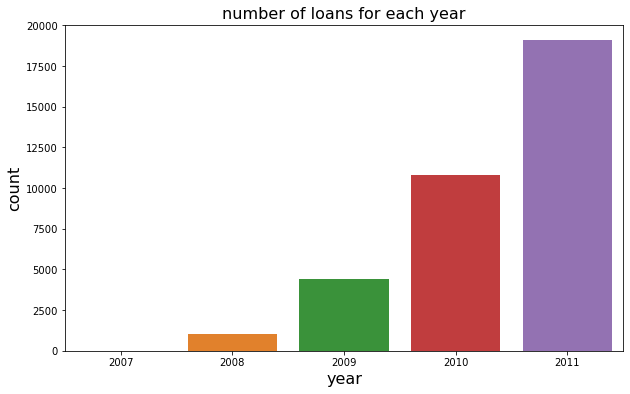

In [51]:
df_grp_issue_d_year = df.groupby('issue_d_year').size().reset_index()
df_grp_issue_d_year
plot_bar(df_grp_issue_d_year,'issue_d_year',0,'number of loans for each year','year','count')

   index issue_d_year  charged_off  total  fraction
0      0         2007            2      6     33.33
1      1         2008          160   1053     15.19
2      2         2009          541   4423     12.23
3      3         2010         1309  10795     12.13
4      4         2011         2931  19090     15.35


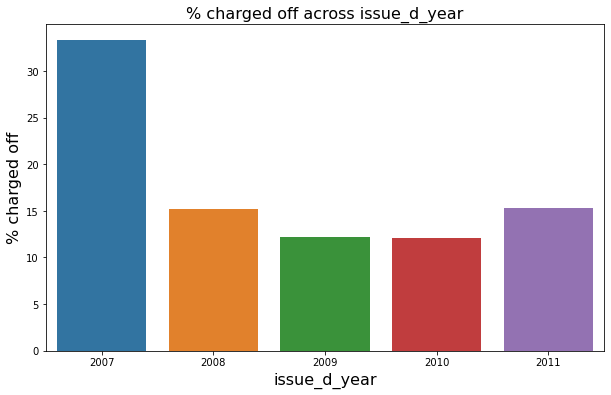

In [52]:
plot_percent_charged_off_over_total(df,'issue_d_year','% charged off across issue_d_year','issue_d_year','% charged off')

   index issue_d_year  charged_off  fraction
0      0         2007            2      0.04
1      1         2008          160      3.24
2      2         2009          541     10.94
3      3         2010         1309     26.48
4      4         2011         2931     59.30


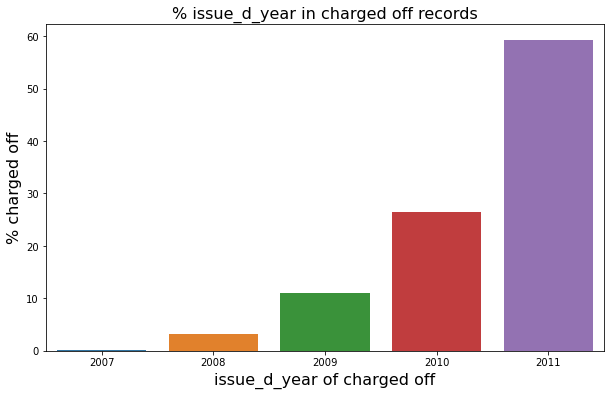

In [53]:
plot_percent_charged_off_over_total_charged_off(df,'issue_d_year','% issue_d_year in charged off records','issue_d_year of charged off','% charged off')

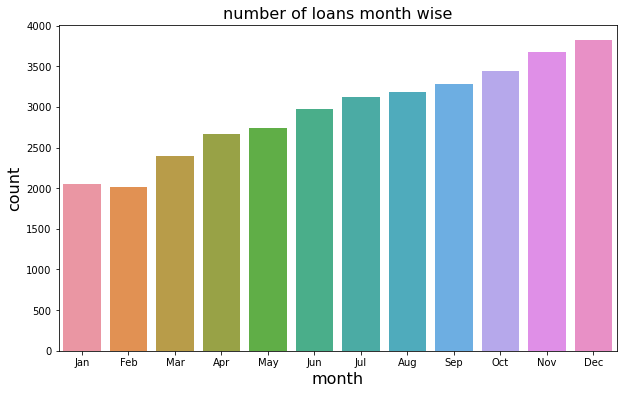

In [54]:
df_grp_issue_d_month = df.groupby('issue_d_month').size().reset_index()
df_grp_issue_d_month = df_grp_issue_d_month.loc[[4,3,7,0,8,6,5,1,11,10,9,2]]
plot_bar(df_grp_issue_d_month,'issue_d_month',0,'number of loans month wise','month','count')

Number of loans provided by LC has been increasing over the years. <br>
Amongst charged off records, majority of the loans are from 2011 and 2010.<br>
As the year comes to end the number of loans issued increase.

#### Purpose

<AxesSubplot:xlabel='purpose'>

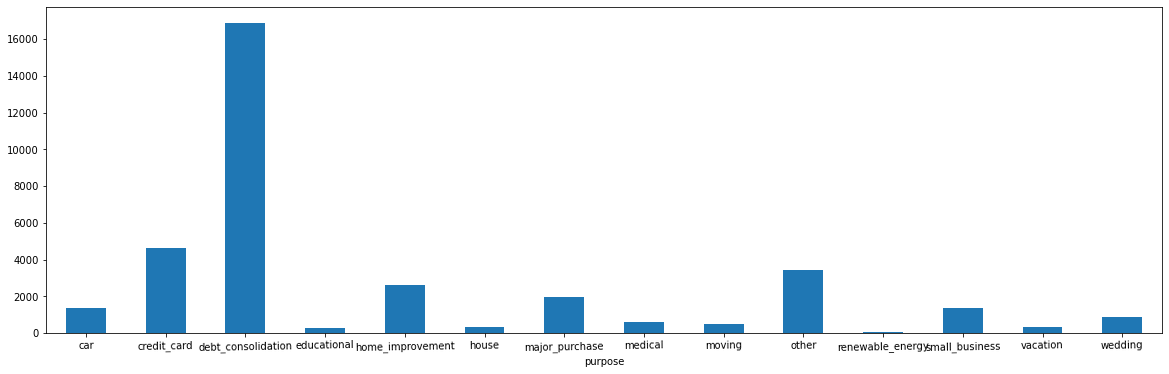

In [55]:
plt.subplots(figsize=(20,6))
df.groupby('purpose').size().plot.bar(rot=1)

<AxesSubplot:xlabel='purpose'>

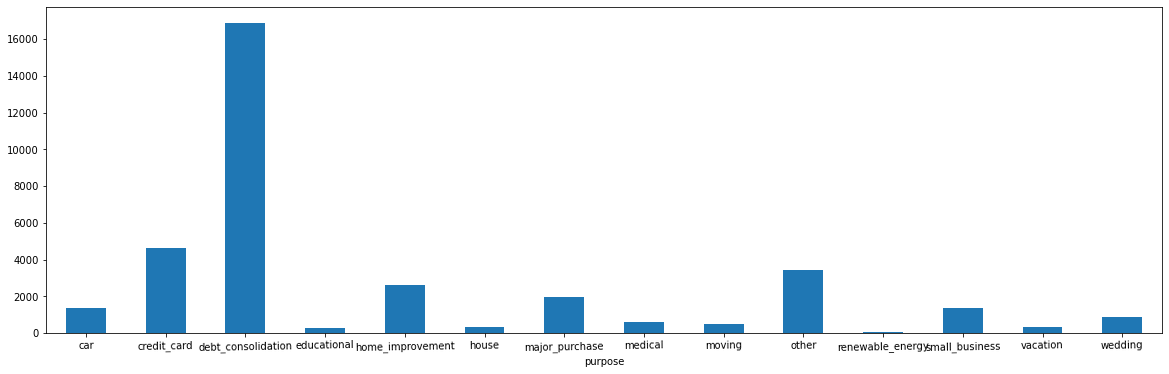

In [56]:
plt.subplots(figsize=(20,6))
df.groupby('purpose').size().plot.bar(rot=1)

    index             purpose  charged_off  total  fraction
0       0                 car          149   1395     10.68
1       1         credit_card          479   4626     10.35
2       2  debt_consolidation         2509  16911     14.84
3       3         educational           45    276     16.30
4       4    home_improvement          296   2614     11.32
5       5               house           52    330     15.76
6       6      major_purchase          190   1973      9.63
7       7             medical           95    622     15.27
8       8              moving           79    523     15.11
9       9               other          546   3462     15.77
10     10    renewable_energy           15     87     17.24
11     11      small_business          356   1351     26.35
12     12            vacation           49    332     14.76
13     13             wedding           83    865      9.60


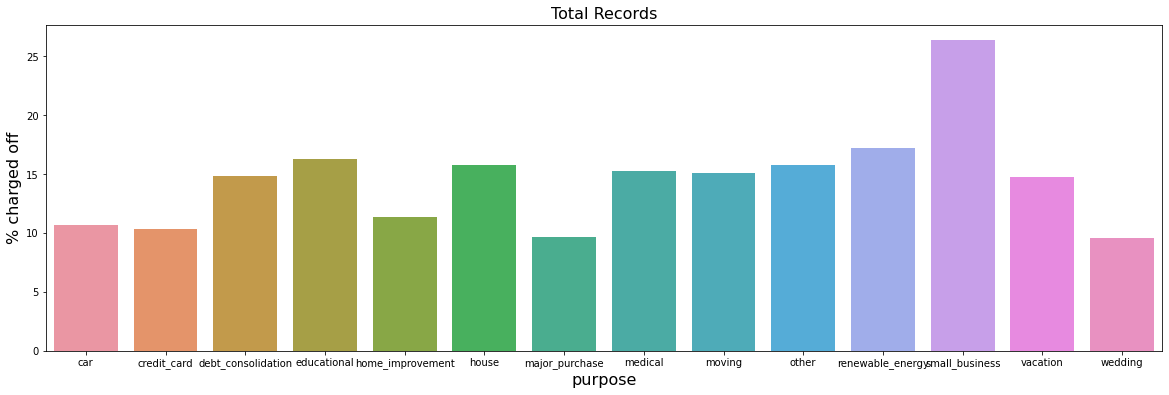

In [57]:
plot_percent_charged_off_over_total(df,'purpose','Total Records','purpose','% charged off',20,6)

Most loans (close to 50 %) are for the purpose of debt_consolidation.<br>
Amongst all Charged off records most loans are for same purpose debt_consolidation.<br>
Small business and renewable_energy have the most number of charged-off loans percentages amongst themselves.<br>

#### Addr_state

<AxesSubplot:xlabel='addr_state'>

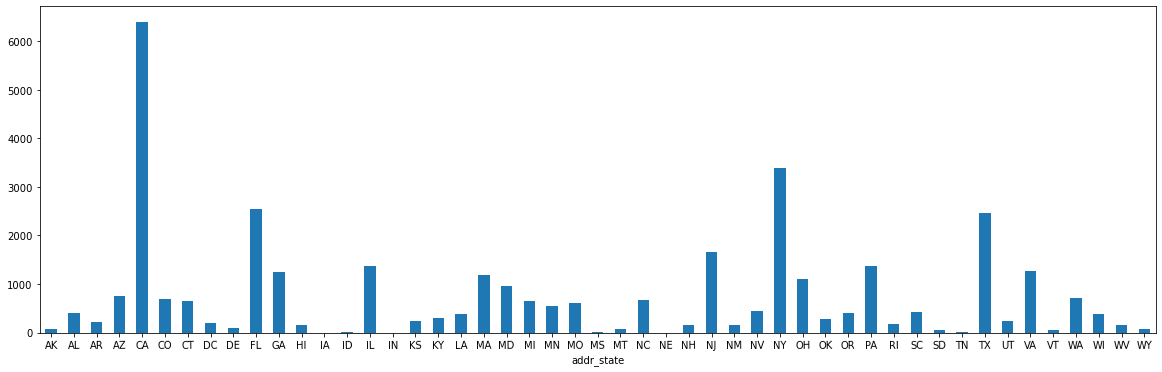

In [58]:
plt.subplots(figsize=(20,6))
df.groupby('addr_state').size().plot.bar(rot=1)

    index addr_state  charged_off  fraction
0       0         AK           15      0.30
1       1         AL           47      0.95
2       2         AR           25      0.51
3       3         AZ          106      2.14
4       4         CA          976     19.75
5       5         CO           80      1.62
6       6         CT           78      1.58
7       7         DC           14      0.28
8       8         DE           11      0.22
9       9         FL          437      8.84
10     10         GA          194      3.92
11     11         HI           26      0.53
12     12         IL          187      3.78
13     13         KS           24      0.49
14     14         KY           43      0.87
15     15         LA           45      0.91
16     16         MA          139      2.81
17     17         MD          140      2.83
18     18         MI           89      1.80
19     19         MN           72      1.46
20     20         MO           95      1.92
21     21         MS            

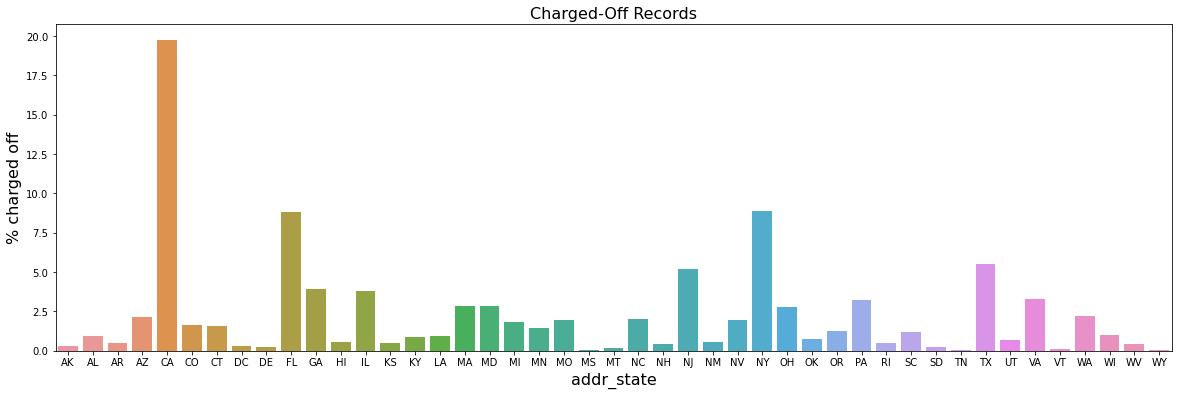

In [59]:
plot_percent_charged_off_over_total_charged_off(df,'addr_state','Charged-Off Records','addr_state','% charged off',20,6)

    index addr_state  charged_off  total  fraction
0       0         AK           15     73     20.55
1       1         AL           47    397     11.84
2       2         AR           25    216     11.57
3       3         AZ          106    758     13.98
4       4         CA          976   6396     15.26
5       5         CO           80    682     11.73
6       6         CT           78    654     11.93
7       7         DC           14    203      6.90
8       8         DE           11    105     10.48
9       9         FL          437   2535     17.24
10     10         GA          194   1253     15.48
11     11         HI           26    153     16.99
12     12         IL          187   1381     13.54
13     13         KS           24    233     10.30
14     14         KY           43    293     14.68
15     15         LA           45    389     11.57
16     16         MA          139   1181     11.77
17     17         MD          140    950     14.74
18     18         MI           

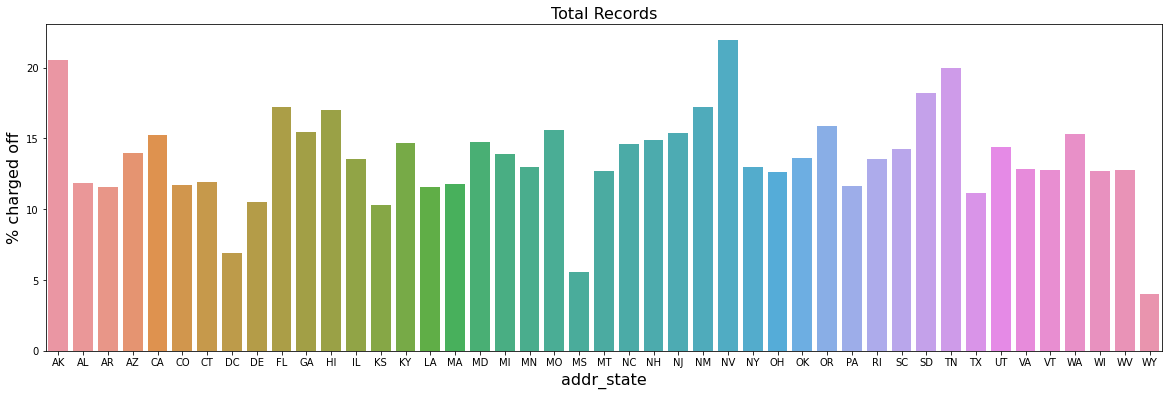

In [60]:
plot_percent_charged_off_over_total(df,'addr_state','Total Records','addr_state','% charged off',20,6)

CA, NY ,FL, TX are the 4 most frequent states from where loans are applied.<br>
Amongst charged off records most records are from these states, which is obvious as they have the highest number of loans.<br>
But state wise, these states have less than 19 % loans charged off.<br>
And states with highest percentage of defaulter have the least number of applied loans (AK,SD,TN,NV)

#### dti

In [61]:
print(df['dti'].describe())
print(df.groupby('loan_status')['dti'].describe())

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64
               count       mean       std  min    25%     50%    75%    max
loan_status                                                                
Charged Off   4943.0  14.160908  6.522564  0.0  9.355  14.440  19.34  29.85
Fully Paid   30424.0  13.280979  6.646843  0.0  8.160  13.345  18.53  29.99


C:\Users\Parag Garg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


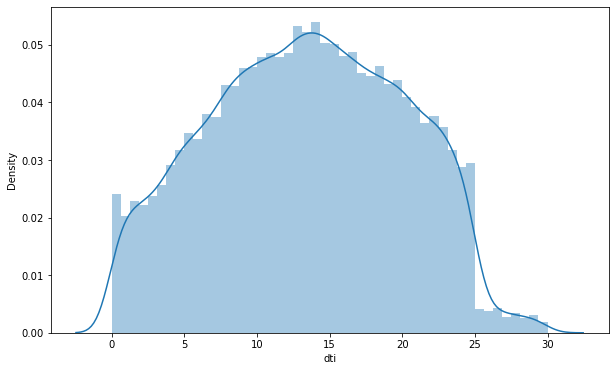

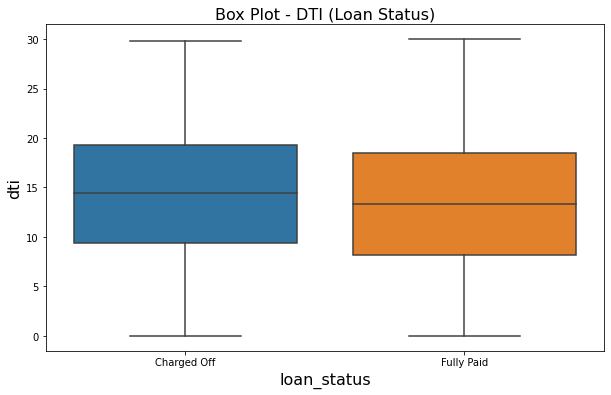

In [62]:
plot_dist(df,'dti')
plot_box(df,'loan_status','dti','Box Plot - DTI (Loan Status)','loan_status','dti')

Average value of dti is slightly higher for charged off.

In [63]:
df['dti_round'] = round(df['dti'])
print(df['dti_round'].min(),df['dti_round'].max())
df['dti_bins'] = pd.cut(df['dti_round'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'],right = True)
df['dti_bins'].unique()

0.0 30.0


['0-5', '15-20', '10-15', '20-25', '5-10', '25-30', NaN]
Categories (6, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30']

<AxesSubplot:xlabel='dti_bins'>

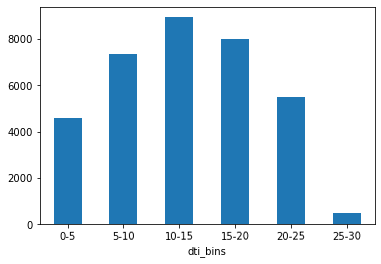

In [64]:
df.groupby('dti_bins').size().plot.bar(rot=1)

   index dti_bins  charged_off  total  fraction
0      0      0-5          533   4587     11.62
1      1     5-10          885   7373     12.00
2      2    10-15         1271   8940     14.22
3      3    15-20         1245   8022     15.52
4      4    20-25          891   5519     16.14
5      5    25-30           69    499     13.83


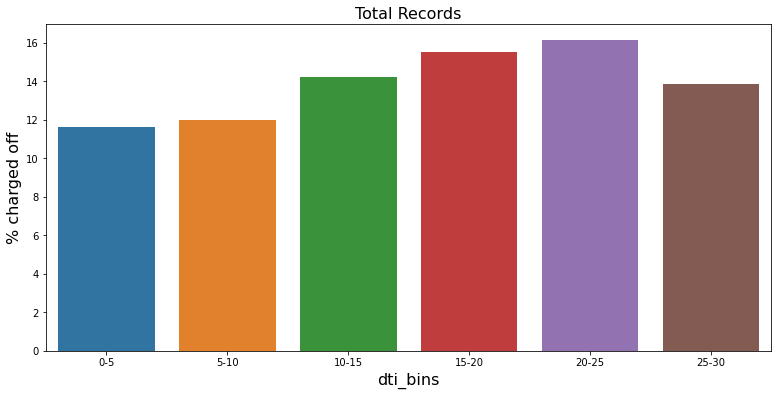

In [65]:
plot_percent_charged_off_over_total(df,'dti_bins','Total Records','dti_bins','% charged off',13,6)

As the dti increases above 15, the % of defaulter also increases.<br>As the dti increases above 15, the % of defaulter also increases.<br>

#### delinq_2yrs

delinq_2yrs
0     31533
1      2939
2       614
3       189
4        53
5        21
6        10
7         4
8         2
9         1
11        1
dtype: int64


<AxesSubplot:xlabel='delinq_2yrs'>

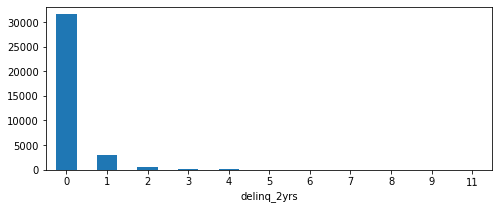

In [66]:
df_delinq = df.groupby('delinq_2yrs').size()
print(df_delinq)
plt.subplots(figsize=(8,3))
df_delinq.plot.bar(rot=1)

   index  delinq_2yrs  charged_off  total  fraction
0      0            0         4355  31533     13.81
1      1            1          433   2939     14.73
2      2            2          112    614     18.24
3      3            3           25    189     13.23
4      4            4           12     53     22.64
5      5            5            3     21     14.29
6      6            6            1     10     10.00
7      7            7            1      4     25.00
8      8            8            1      2     50.00


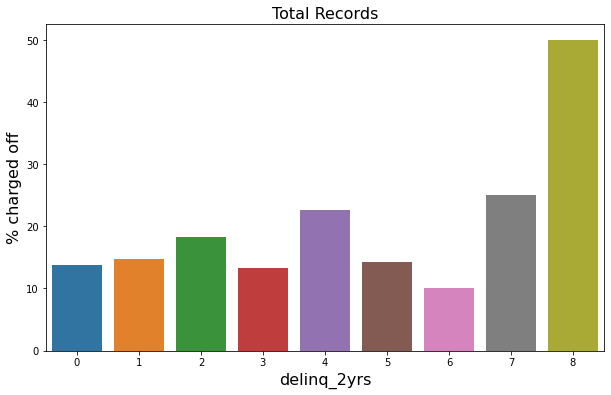

In [67]:
plot_percent_charged_off_over_total(df,'delinq_2yrs','Total Records','delinq_2yrs','% charged off')

Applicants with delinq_2yrs value greater than 0 have slightly high percentage of defaults on average for all values like 1,2,3,4,5,6.

#### Earliest_cr_line

First, lets convert the earliest_cr_line column into datetime type column.<br>
Lets create two derived variables for month and year extracted from earliest_cr_line



In [68]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: str(x).split('-')[0])
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x:  '19'+str(x).split('-')[1] if int(str(x).split('-')[1]) > 11 else '20'+str(x).split('-')[1]  )
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line_year'].astype(str)  + df['earliest_cr_line_month'], format='%Y%b')                      

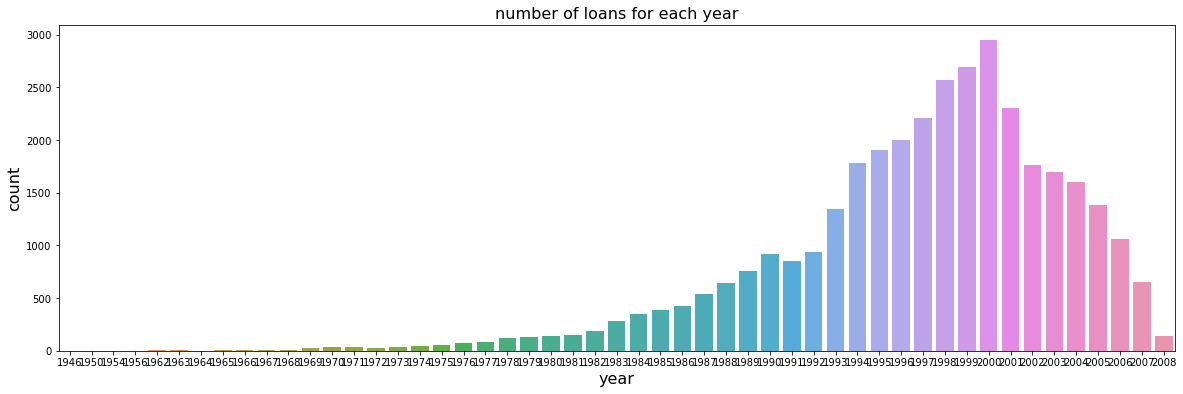

In [69]:
df_grp_earliest_cr_line_year = df.groupby('earliest_cr_line_year').size().reset_index()
df_grp_earliest_cr_line_year
plot_bar(df_grp_earliest_cr_line_year,'earliest_cr_line_year',0,'number of loans for each year','year','count',20,6)

    index earliest_cr_line_year  charged_off  total  fraction
0       0                  1962            1      3     33.33
1       1                  1965            1      5     20.00
2       2                  1967            3     12     25.00
3       3                  1968            4     12     33.33
4       4                  1969            1     22      4.55
5       5                  1970            4     35     11.43
6       6                  1971            3     33      9.09
7       7                  1972            5     29     17.24
8       8                  1973            7     39     17.95
9       9                  1974            4     49      8.16
10     10                  1975            6     57     10.53
11     11                  1976            3     70      4.29
12     12                  1977            9     87     10.34
13     13                  1978           14    126     11.11
14     14                  1979           28    133     21.05
15     1

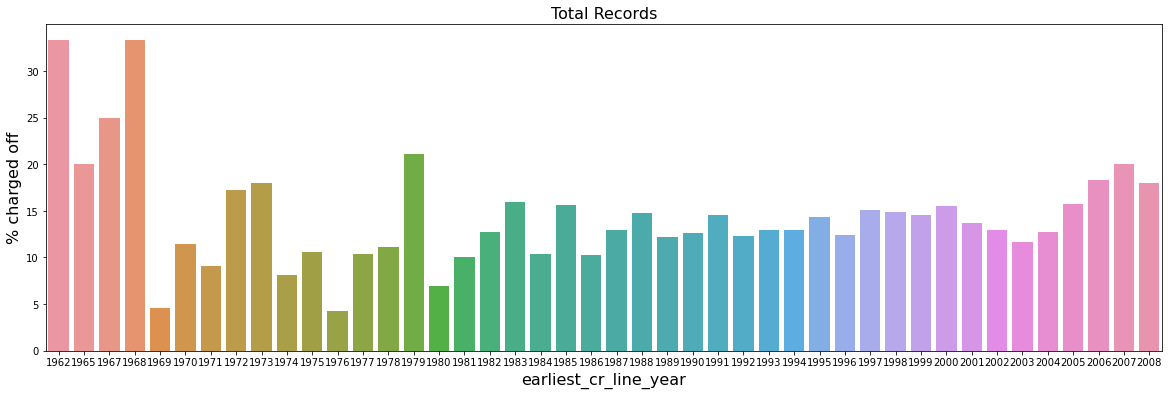

In [70]:
plot_percent_charged_off_over_total(df,'earliest_cr_line_year','Total Records','earliest_cr_line_year','% charged off',20,6)


% of defaulters as the graph suggest 10-20 % for most of the year.

#### inq_last_6mths

inq_last_6mths
0    17183
1     9774
2     5208
3     2703
4      280
5      123
6       54
7       31
8       11
dtype: int64


<AxesSubplot:xlabel='inq_last_6mths'>

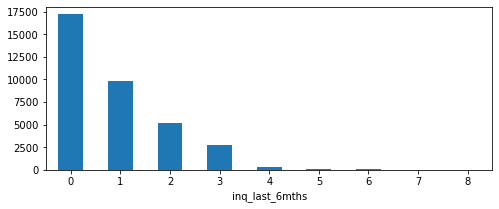

In [71]:
df_delinq = df.groupby('inq_last_6mths').size()
print(df_delinq)
plt.subplots(figsize=(8,3))
df_delinq.plot.bar(rot=1)

   index  inq_last_6mths  charged_off  total  fraction
0      0               0         2006  17183     11.67
1      1               1         1488   9774     15.22
2      2               2          827   5208     15.88
3      3               3          541   2703     20.01
4      4               4           35    280     12.50
5      5               5           22    123     17.89
6      6               6           14     54     25.93
7      7               7            8     31     25.81
8      8               8            2     11     18.18


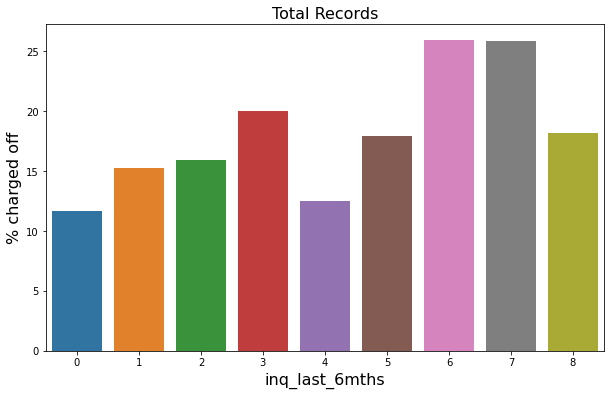

In [72]:
plot_percent_charged_off_over_total(df,'inq_last_6mths','Total Records','inq_last_6mths','% charged off')

Most applicants (close to 50 %) have never inquired in the 6 months.<br>
People who enquire seem to have high chances to default.

#### pub_rec

In [73]:
df['pub_rec'].describe()

count    35367.000000
mean         0.054147
std          0.235734
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

Text(0, 0.5, 'pub_rec')

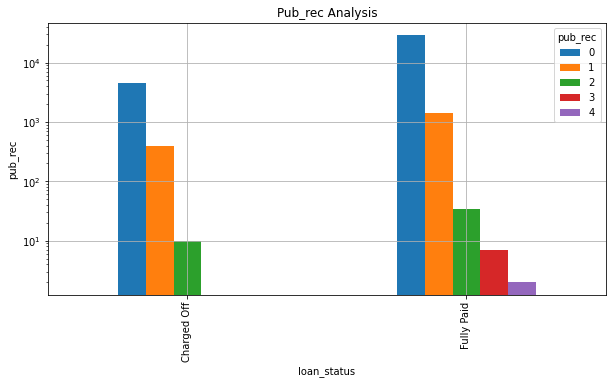

In [74]:
res1=pd.pivot_table(df, values='id', index=['loan_status'],
                    columns=['pub_rec'], aggfunc=np.size)

res1.plot.bar(logy=True,figsize=(10,5),grid=True)
plt.title('Pub_rec Analysis')
plt.ylabel('pub_rec')

pub_rec is not directly corelated or impacting the loan paid, as the trend is similar for both

#### revol_bal

In [75]:
df['revol_bal'].describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

Text(0, 0.5, 'revol_bal')

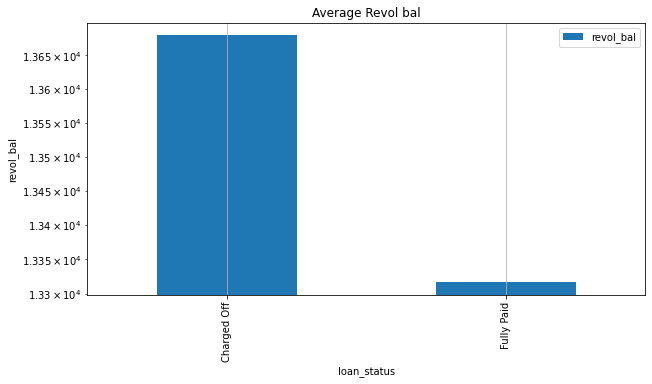

In [76]:
res2=df.groupby('loan_status').revol_bal.mean().reset_index()
res2 = res2.set_index("loan_status")
res2.plot.bar(logy=True,figsize=(10,5),grid=True)
plt.title('Average Revol bal')
plt.ylabel('revol_bal')

The varibale revol_bal does not have much effect on charged off and fully paid loans

#### revol_util

In [77]:
df['revol_util'].describe()

count     35367
unique     1081
top          0%
freq        832
Name: revol_util, dtype: object

In [78]:
df["revol_util_actual"]= df["revol_util"].str.split("%", n = 1, expand = True)[0]
df["revol_util_actual"]=df["revol_util_actual"].astype(float)
df['revol_util_bins'] = pd.cut(x=df['revol_util_actual'], bins=[10, 20, 30, 40,50,60,70,80,90,100])
res3=pd.pivot_table(df, values='id', index=['revol_util_bins'],
                    columns=['loan_status'], aggfunc=np.size)

Text(0, 0.5, 'revol_util')

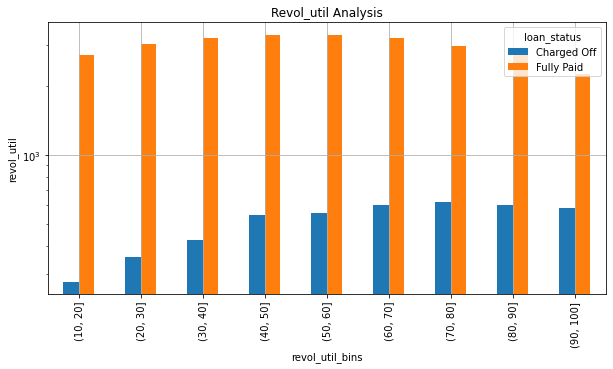

In [79]:
res3.plot.bar(logy=True,figsize=(10,5),grid=True)
plt.title('Revol_util Analysis')
plt.ylabel('revol_util')

Charged off loans are affected by revol_utils as the revol % increases risk of loan being charged off increases with highest risk lying when revol_util is under the range of 60 -90 %



#### total_acc

In [80]:
df['total_acc'].describe()

count    35367.000000
mean        22.209206
std         11.403045
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [81]:
df['total_acc_bins'] = pd.cut(x=df['total_acc'], bins=[10, 20, 30, 40,50,60,70,80,90])
res4=pd.pivot_table(df, values='id', index=['total_acc_bins'],
                    columns=['loan_status'], aggfunc=np.size)
count=df.loc[(df.loan_status=='Charged Off'),['loan_status']].count()
count1=df.loc[(df.loan_status=='Fully Paid'),['loan_status']].count()
count=float(count)
count1=float(count1)
res4['Charged Off']=(res4['Charged Off']/count)*100
res4['Fully Paid']=(res4['Fully Paid']/count1)*100

Text(0, 0.5, 'total_accs_per')

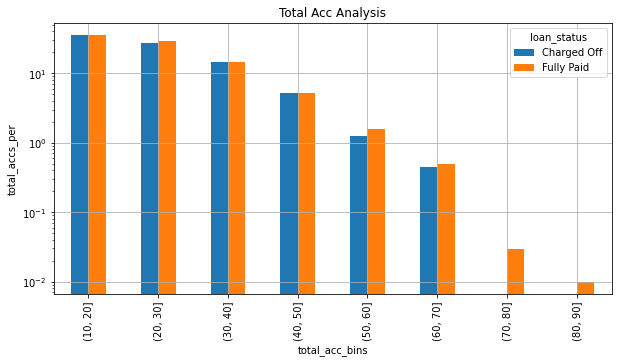

In [82]:
res4.plot.bar(logy=True,figsize=(10,5),grid=True)
plt.title('Total Acc Analysis')
plt.ylabel('total_accs_per')

Total accounts does not impact the charged off loans as the percenatge is equivalent in both the sections

### Summary

As per Univariate Analysis key indicators for loan default are as follows:

1)loan_amnt<br>
2)term<br>
3)Interest<br>
4)grade<br>
5)sub_grade<br>
6)emp_length<br>
7)home_ownership<br>
8)annual_inc<br>
9)dti<br>
10)delinq_2yrs<br>
11)purpose<br>
12)revol_util<br>

## Bivariate Analysis

To further narrow down the key indicators of loan default we will perfom bivariate & segmented univariate analysis<br>
In this analysis we can check whether the univariate analysis hold true when variable is checked with others

#### Annual Income

Lets analyse Annual Income with other important Applicant variables, to conclude whether the charged off loans depend highly on Annual Income or not

In [83]:
# Annual income Vs. Emp_length

res16=pd.pivot_table(df, values='annual_inc', index=['loan_status'],
                    columns=['emp_length'], aggfunc=np.mean)

In [84]:
# Annual income Vs. dti

df['dti_bins'] = pd.cut(x=df['dti'], bins=[5,10,15,20,25,30])
res17=pd.pivot_table(df, values='annual_inc', index=['loan_status'],
                    columns=['dti_bins'], aggfunc=np.mean)

In [85]:
# Annual Income Vs Home Ownership

res18=pd.pivot_table(df, values='annual_inc', index=['loan_status'],
                    columns=['home_ownership'], aggfunc=np.mean)

In [86]:
# Annual Income Vs delinq_2yrs

res19=pd.pivot_table(df, values='annual_inc', index=['loan_status'],
                    columns=['delinq_2yrs'], aggfunc=np.mean)

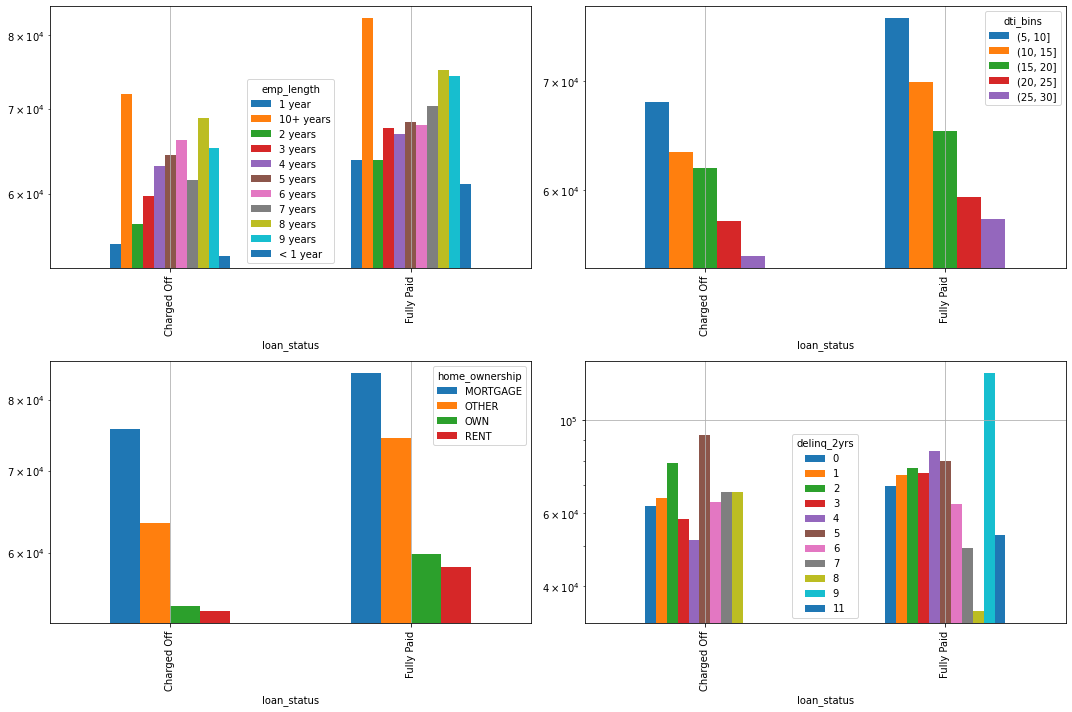

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(100,100))

res16.plot.bar(ax=axes[0,0],logy=True,figsize=(15,10),grid=True)
res17.plot.bar(ax=axes[0,1],logy=True,figsize=(15,10),grid=True)
res18.plot.bar(ax=axes[1,0],logy=True,figsize=(15,10),grid=True)
res19.plot.bar(ax=axes[1,1],logy=True,figsize=(15,10),grid=True)
fig.tight_layout()

Annual Income for charged off cases is lower then Fully paid, whereas the annual income varies in a diferent pattern against different variables as seen above<br>
Annual income is highest for mortgage home ownsershi applicants & for applicants having emp_length greater then 20 yrs<br>
Univariate analysis showed that Highest defaulters are also from mortgage & over 10years employed<br>

<h6> dti however stands true showing that people having high DTI have lower annual income, and as we know dti is higher for charged off cases<br>
Thus it seems to be a strong indicator

#### Home Ownership

Lets analyse Home_ownership with other important Applicant variables

In [88]:
# Home Ownership Vs Dti

res20=pd.pivot_table(df, values='dti', index=['loan_status'],
                    columns=['home_ownership'], aggfunc=np.mean)

In [89]:
# Home Ownership Vs delinq_2yrs

res21=pd.pivot_table(df, values='delinq_2yrs', index=['loan_status'],
                    columns=['home_ownership'], aggfunc=np.mean)

Text(0.5, 1.0, 'Home Ownership Vs delinq_2yrs')

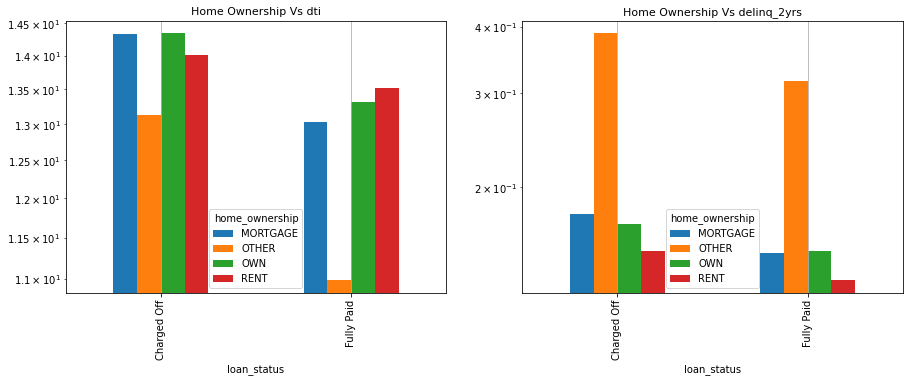

In [90]:
fig, axes = plt.subplots(ncols=2,figsize=(50,50))

res20.plot.bar(ax=axes[0],logy=True,figsize=(15,5),grid=True)
res21.plot.bar(ax=axes[1],logy=True,figsize=(15,5),grid=True)
axes[0].set_title('Home Ownership Vs dti',fontsize=11)
axes[1].set_title('Home Ownership Vs delinq_2yrs',fontsize=11)

<h6> dti for home ownership as Mortgage & Rent is on the higher side, indicating that these can be strong indicators for defaulters

Home Ownership vs delinq_2yrs does not relate hevaily with defaults as its high for others case in both kind of loan status

#### Emp_length

In [91]:
res22=pd.pivot_table(df, values='dti', index=['loan_status'],
                    columns=['emp_length'], aggfunc=np.mean)

In [92]:
res23=pd.pivot_table(df, values='delinq_2yrs', index=['loan_status'],
                    columns=['emp_length'], aggfunc=np.mean)

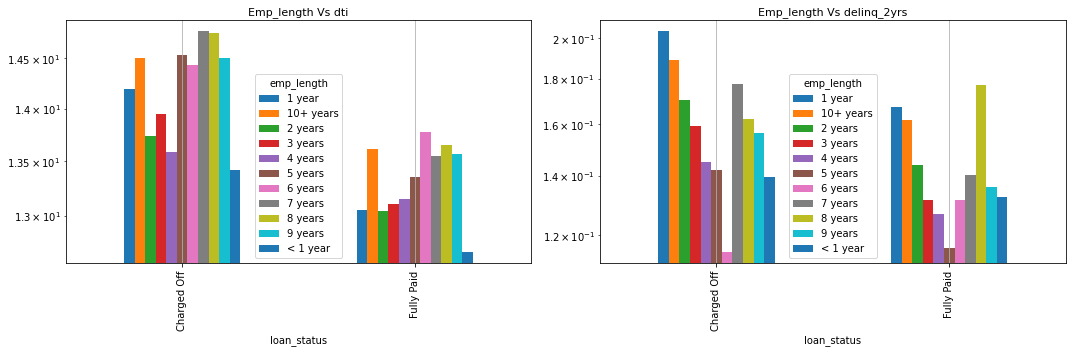

In [93]:
fig, axes = plt.subplots(ncols=2,figsize=(50,50))

res22.plot.bar(ax=axes[0],logy=True,figsize=(15,5),grid=True)
res23.plot.bar(ax=axes[1],logy=True,figsize=(15,5),grid=True)
axes[0].set_title('Emp_length Vs dti',fontsize=11)
axes[1].set_title('Emp_length Vs delinq_2yrs',fontsize=11)

fig.tight_layout()

<h6> dti holds true as it increases with emp length and average dti is greater for charged off cases

#### Loan Amount

Lets analyze different loan application parameters with each other to conclude the strongest indicator

In [94]:
# Loan Amount Vs. Term

res23=pd.pivot_table(df, values='loan_amnt', index=['loan_status'],
                    columns=['term'], aggfunc=np.mean)

In [95]:
# Loan Amount Vs.Interest Rate

df['Interest_actual']= df["int_rate"].str.split("%", n = 1, expand = True)[0]
df["Interest_actual"]=df["Interest_actual"].astype(float)
df['Interest_actual_bins']=pd.cut(x=df['Interest_actual'], bins=[5,10,15,20,25,30])
res24=pd.pivot_table(df, values='loan_amnt', index=['loan_status'],
                    columns=['Interest_actual_bins'], aggfunc=np.mean)

In [96]:
# Loan Amount Vs. Grade

res25=pd.pivot_table(df, values='loan_amnt', index=['loan_status'],
                    columns=['grade'], aggfunc=np.mean)

In [97]:
# Loan Amount Vs. Purpose

res26=pd.pivot_table(df, values='loan_amnt', index=['loan_status'],
                    columns=['purpose'], aggfunc=np.mean)


Text(0.5, 1.0, 'Loan Amount Vs. purpose')

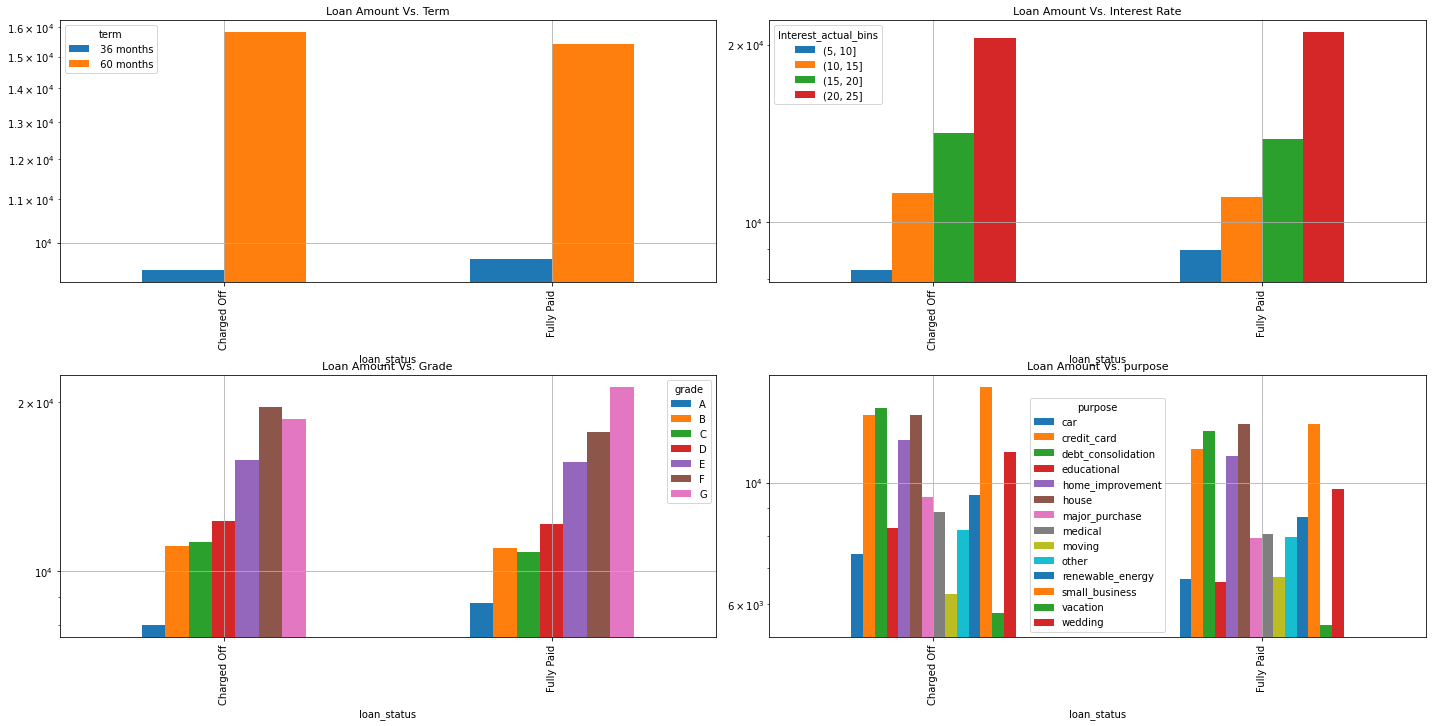

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(110,150))

res23.plot.bar(ax=axes[0,0],logy=True,figsize=(20,10),grid=True)
res24.plot.bar(ax=axes[0,1],logy=True,figsize=(20,10),grid=True)
res25.plot.bar(ax=axes[1,0],logy=True,figsize=(20,10),grid=True)
res26.plot.bar(ax=axes[1,1],logy=True,figsize=(20,10),grid=True)
fig.tight_layout()

axes[0,0].set_title('Loan Amount Vs. Term',fontsize=11)
axes[0,1].set_title('Loan Amount Vs. Interest Rate',fontsize=11)
axes[1,0].set_title('Loan Amount Vs. Grade',fontsize=11)
axes[1,1].set_title('Loan Amount Vs. purpose',fontsize=11)

<h6> Loan Amount,Term, Grade & Interest rate all are directly proportional to each other<br>

- Higher Loan amount tends to have higher term<br>
- Higher loan amount & higher term tends to have higher grade<br>
- Higher grade will imply higher interest rate<br>

<h6>
    Loans with higher amount, term, grade & interest rate tends to het charged off more often

<h6>Purpose also holds true in this analysis as most of the cases that are charged off are from debt_consolidation & small business<br>
Higher amount loans are also tend to be given in these two categories

#### Term

In [99]:
# Term Vs. Interest rate

res27=pd.pivot_table(df, values='Interest_actual', index=['loan_status'],
                    columns=['term'], aggfunc=np.mean)

In [100]:
# Term Vs. Purpose

df["term_actual"]= df["term"].str.split("m",n=1,expand=True)[0]
df["term_actual"]=df["term_actual"].astype(float)

res28=pd.pivot_table(df, values='term_actual', index=['loan_status'],
                    columns=['purpose'], aggfunc=np.mean)

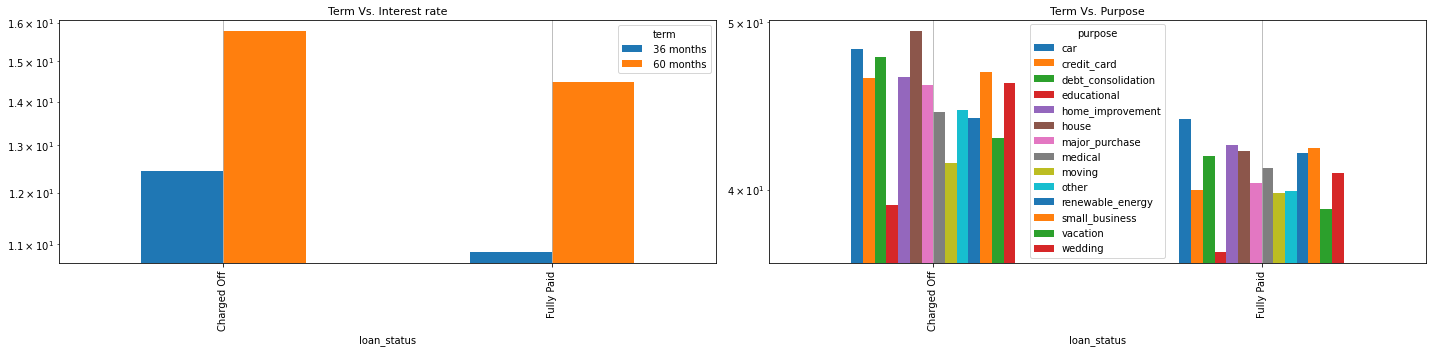

In [101]:
fig, axes = plt.subplots(ncols=2,figsize=(50,50))

res27.plot.bar(ax=axes[0],logy=True,figsize=(20,5),grid=True)
res28.plot.bar(ax=axes[1],logy=True,figsize=(20,5),grid=True)
axes[0].set_title('Term Vs. Interest rate',fontsize=11)
axes[1].set_title('Term Vs. Purpose',fontsize=11)

fig.tight_layout()

#### Interest Rate

In [102]:
# Interest Rate Vs Purpose

res29=pd.pivot_table(df, values='Interest_actual', index=['loan_status'],
                    columns=['purpose'], aggfunc=np.mean)

In [103]:
# Interest Rate Vs grade

res30=pd.pivot_table(df, values='Interest_actual', index=['loan_status'],
                    columns=['grade'], aggfunc=np.mean)

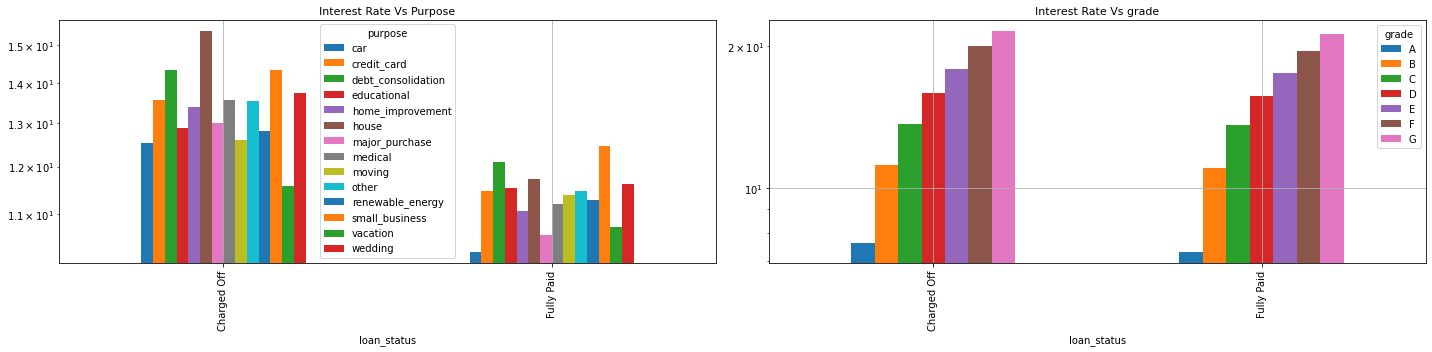

In [104]:
fig, axes = plt.subplots(ncols=2,figsize=(50,50))

res29.plot.bar(ax=axes[0],logy=True,figsize=(20,5),grid=True)
res30.plot.bar(ax=axes[1],logy=True,figsize=(20,5),grid=True)
axes[0].set_title('Interest Rate Vs Purpose',fontsize=11)
axes[1].set_title('Interest Rate Vs grade',fontsize=11)

fig.tight_layout()

<h6>From the above graph its evident that interest rates for debt_consolidation & small busiess are on the higher sides<br>
Most no. of default cases comes from small business and debt_consolidation thus purpose is one of the strong indicator

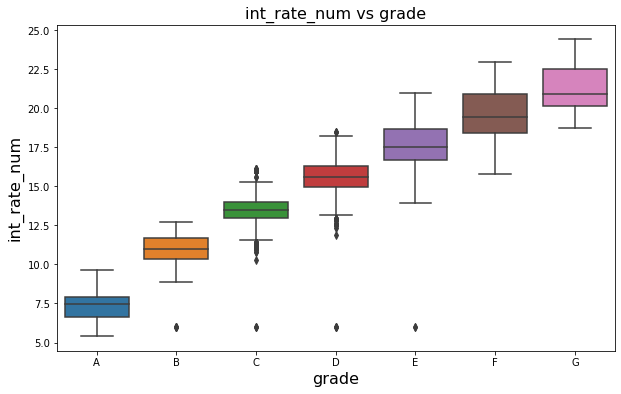

In [105]:
plot_box(df.sort_values('grade'),'grade','int_rate_num','int_rate_num vs grade','grade','int_rate_num')

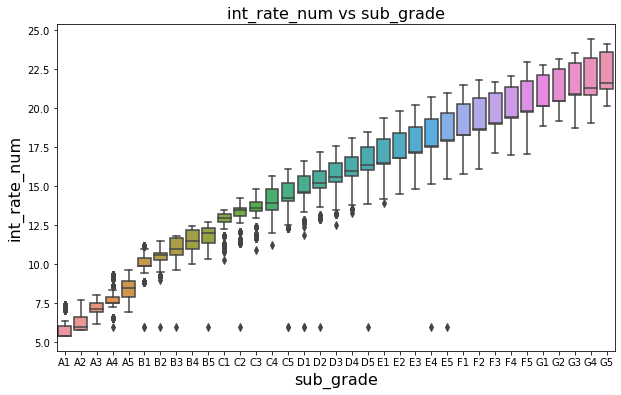

In [106]:
plot_box(df.sort_values('sub_grade'),'sub_grade','int_rate_num','int_rate_num vs sub_grade','sub_grade','int_rate_num')

<h6> From the above analysis we can observe that for a loan amount applied "term" & "grade" really helps to indicate defaulters case as defaulters cases are high whrn term & grade are high

As Interest rate is calculated on the basis of term & grade thus these both are more relevant driving factors

#### Loan Amount Vs. Annual Income

<AxesSubplot:xlabel='loan_amnt', ylabel='annual_inc'>

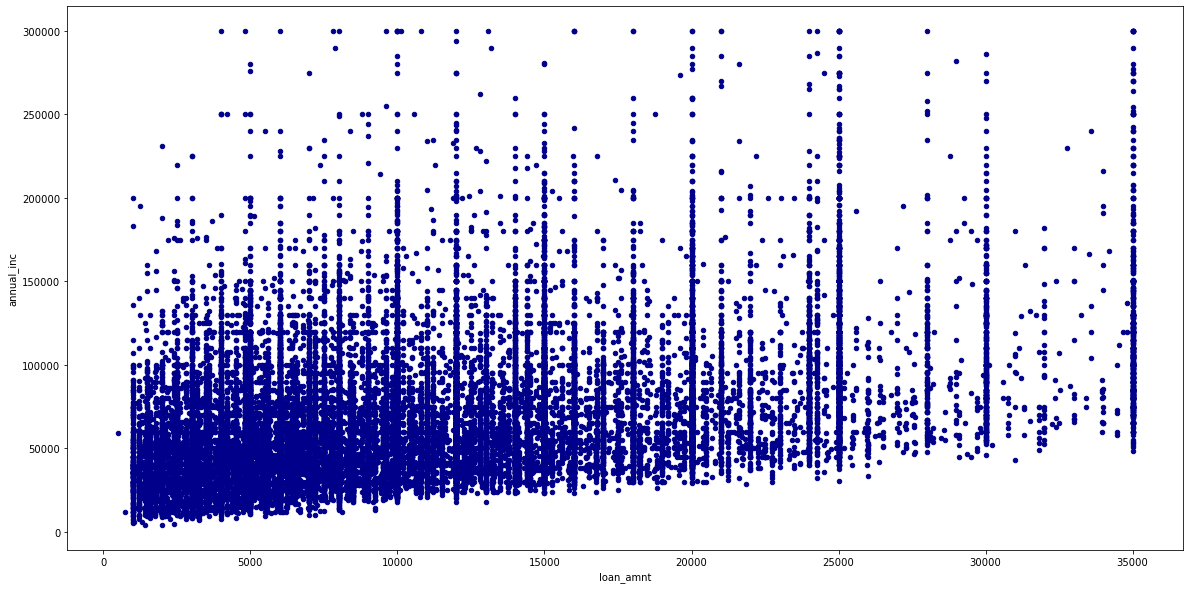

In [107]:
df[df.annual_inc <= 300000].plot.scatter(x = 'loan_amnt',y = 'annual_inc',c='DarkBlue',figsize=(20,10))

Its clear as the annual income is increasing the maximum loan amount is also increasing.<br>
But there are a lot of cases where the annual income is less than 50 k and they have loans of amount greater than 20000.

#### Annual Income Vs. Interest Rate

<AxesSubplot:xlabel='annual_inc', ylabel='int_rate_num'>

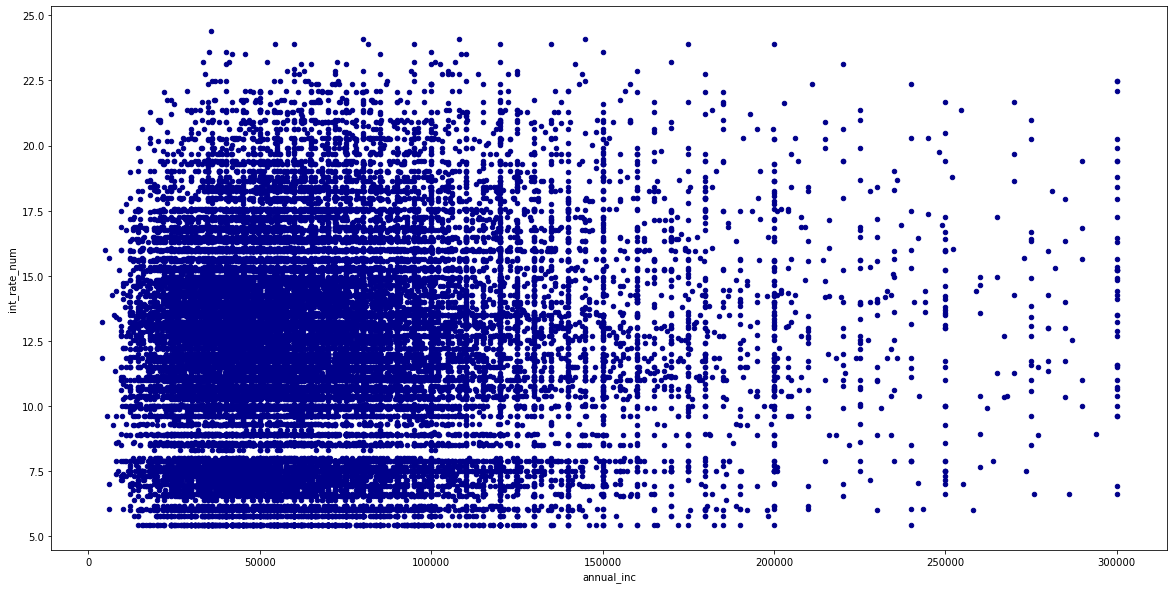

In [108]:
df[df.annual_inc <= 300000].plot.scatter(x = 'annual_inc',y = 'int_rate_num',c='DarkBlue',figsize=(20,10))

Majority of the interest rate lies in the range of 10-15 as it's extremely dense in that section of the graph.<gr>
All kinds of interest rates are spread over various range of Annual Income, most dense being annual income lower then 10000 & interest rate 10~15 %

#### Revol_util

In [109]:
# Revol_util Vs. Interest Rate

res35=pd.pivot_table(df, values='Interest_actual', index=['loan_status'],
                    columns=['revol_util_bins'], aggfunc=np.mean)

In [110]:
# Revol_util Vs. dti

res36=pd.pivot_table(df, values='dti', index=['loan_status'],
                    columns=['revol_util_bins'], aggfunc=np.mean)

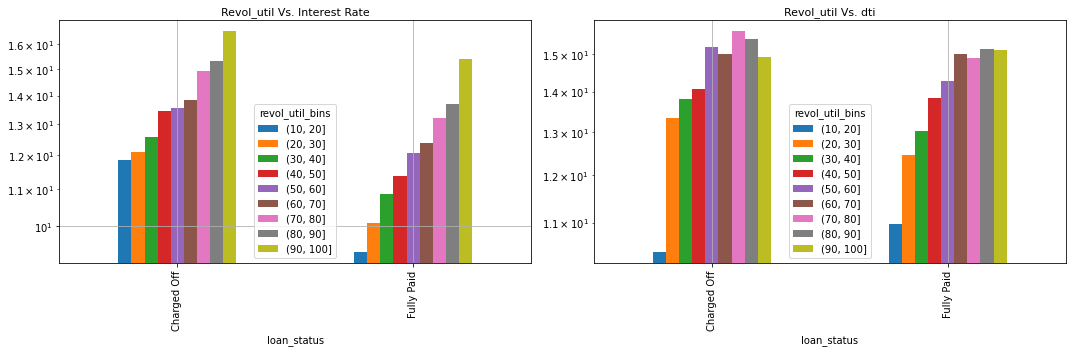

In [111]:
fig, axes = plt.subplots(ncols=2,figsize=(50,50))

res35.plot.bar(ax=axes[0],logy=True,figsize=(15,5),grid=True)
res36.plot.bar(ax=axes[1],logy=True,figsize=(15,5),grid=True)
axes[0].set_title('Revol_util Vs. Interest Rate',fontsize=11)
axes[1].set_title('Revol_util Vs. dti',fontsize=11)

fig.tight_layout()

<h6> As seen above Interest rate is higher for higher Revol_util & also dti is higher for higher Revol util peaking between 70 ~ 80%<br>
    Thus we can observe revol_util is one of the stronger indicators of laon default, as revol util increases risk of default increases
    

### Summary:

<h6>As per above bivariate analysis few key variables that indicate loan defaulters are:<br>
    1) Term <br>
    2) Grade <br>
    3) DTI <br>
    4) Purpose <br>
    5) Revolv_Util <br>

- Loan_amount, Term, grade, sub_grade & interest rate are highly related to each other<br>
    Charged off cases increases as above variables tend to increase<br>
- "term" & "grade" for an applied "loan amount" are one of the key driving factors for checkng loan defaulters as Interest rate is depndent of these two and as term, grade increases interest rate will also increase and chances of default gets higher<br>
    Charged off cases are high where higher interest rate has been applied<br>
    
- dti is higher for Charged off cases and it holds true when checked with emp_length & home_ownership also

- Purpose analysis clearly indcate if the applicant is taking loan for Small business or debt_consolidation his/her chances of default are much higher 

- Revol_Util clealry indicates as the revol_utilization increases risk to default increases

## Correlation

To derive a correlation matrix lets create new data frame with only the relavant columns that are analysed to indicate loan defaulters

In [112]:
#Creating new Dataframe

df1=df.loc[:,['loan_amnt','term_actual','Interest_actual','grade','sub_grade','emp_length','home_ownership','annual_inc','loan_status','dti','delinq_2yrs','purpose','revol_util_actual']]

In [113]:
df1.columns

Index(['loan_amnt', 'term_actual', 'Interest_actual', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'purpose', 'revol_util_actual'],
      dtype='object')

In [114]:
# Converting Categorical variables to numeric

df1['emp_length_actual']=df1['emp_length'].str.split("y",n=1,expand=True)[0]
df1.loc[(df1['emp_length_actual']=='< 1 '),['emp_length_actual']]=0
df1.loc[(df1['emp_length_actual']=='10+ '),['emp_length_actual']]=11

In [115]:
df1['emp_length_actual']=df1['emp_length_actual'].astype(float)

In [116]:
# Creating numeric target column

df1['target']=0

In [117]:
df1.loc[df1['loan_status']=='Charged Off',['target']]= 1

In [118]:
df1['grade_actual']=0
   
df1.loc[df1['grade']=='A',['grade_actual']]=1
df1.loc[df1['grade']=='B',['grade_actual']]=2
df1.loc[df1['grade']=='C',['grade_actual']]=3
df1.loc[df1['grade']=='D',['grade_actual']]=4
df1.loc[df1['grade']=='E',['grade_actual']]=5
df1.loc[df1['grade']=='F',['grade_actual']]=6
df1.loc[df1['grade']=='G',['grade_actual']]=7

In [119]:
cor=df1.corr()

In [120]:
corr_matrix = df1.corr()

In [121]:
print(corr_matrix)

                   loan_amnt  term_actual  Interest_actual  annual_inc  \
loan_amnt           1.000000     0.350011         0.299997    0.258984   
term_actual         0.350011     1.000000         0.441850    0.046032   
Interest_actual     0.299997     0.441850         1.000000    0.047350   
annual_inc          0.258984     0.046032         0.047350    1.000000   
dti                 0.063093     0.074198         0.110755   -0.120855   
delinq_2yrs        -0.035290     0.008634         0.158692    0.022572   
revol_util_actual   0.067081     0.065146         0.467523    0.018257   
emp_length_actual   0.145645     0.100783         0.000338    0.110494   
target              0.063441     0.179143         0.211895   -0.038290   
grade_actual        0.286254     0.435201         0.950486    0.050973   

                        dti  delinq_2yrs  revol_util_actual  \
loan_amnt          0.063093    -0.035290           0.067081   
term_actual        0.074198     0.008634           0.065146

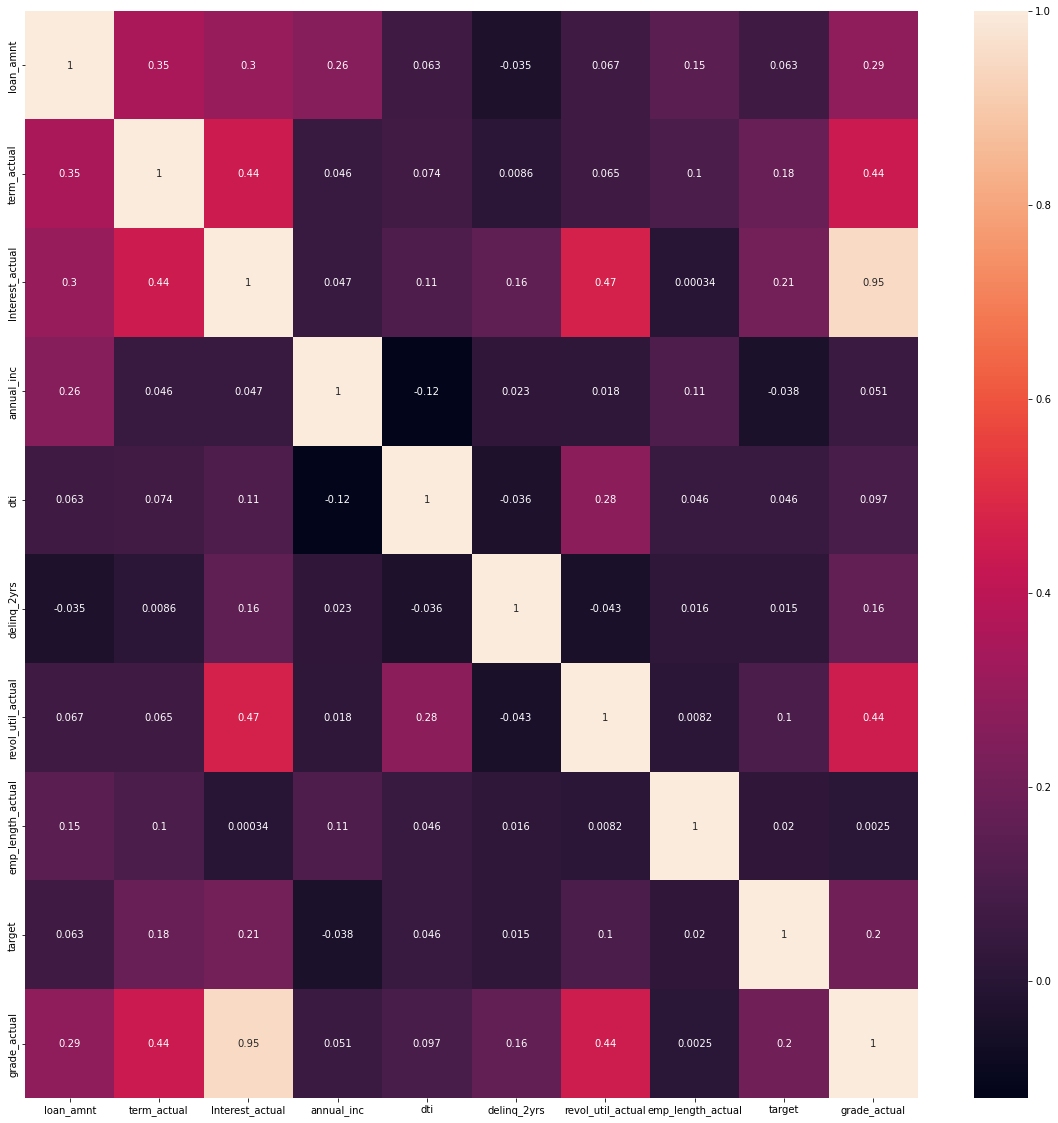

In [122]:
f, ax = plt.subplots(figsize=(20, 20))

ax=sns.heatmap(cor, annot=True)

On drawing the correlation matrix also the variables which are the most correlated with the target ("Charged Off loans") are :<br>
Grade, Term , interest rate,revol_util & Dti, 

### Conclusion

<h6> After all the anslysis (as shown above) the 5 driving factors that indicate the loan can be defaulted for a given loan amount are:<br>
    1) Term<br>
    2) Grade<br>
    3) dti<br>
    4) Purpose<br>
    5) Revol_util<br>

FEATURE ENGINEERING

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [124]:
df1.head(5)

,loan_amnt,term_actual,Interest_actual,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,purpose,revol_util_actual,emp_length_actual,target,grade_actual
1,2500,60.0,15.27,C,C4,< 1 year,RENT,30000.0,Charged Off,1.00,0,car,9.4,0.0,1,3
3,10000,36.0,13.49,C,C1,10+ years,RENT,49200.0,Fully Paid,20.00,0,other,21.0,11.0,0,3
5,5000,36.0,7.90,A,A4,3 years,RENT,36000.0,Fully Paid,11.20,0,wedding,28.3,3.0,0,1
6,7000,60.0,15.96,C,C5,8 years,RENT,47004.0,Fully Paid,23.51,0,debt_consolidation,85.6,8.0,0,3
7,3000,36.0,18.64,E,E1,9 years,RENT,48000.0,Fully Paid,5.35,0,car,87.5,9.0,0,5


In [125]:
X = df1.drop('loan_status', axis=1)
y = df1['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
# Fit a logistic regression model to the training data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.86268966167185


C:\Users\Parag Garg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


After doing analysis using correlation matrix also the variables which are the most correlated with the target ("Charged Off loans") are :
Grade, Term , interest rate,revol_util & Dti,

In [128]:
df2=df1.loc[:,['Interest_actual','grade_actual','Interest_actual','revol_util_actual','grade_actual','term_actual','loan_status']]

In [129]:
X = df2.drop('loan_status', axis=1)
y = df2['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
# Fit a logistic regression model to the training data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Classification report:\n{report}")

Accuracy: 0.8625011780228066
Classification report:
              precision    recall  f1-score   support

 Charged Off       0.25      0.00      0.00      1457
  Fully Paid       0.86      1.00      0.93      9154

    accuracy                           0.86     10611
   macro avg       0.56      0.50      0.46     10611
weighted avg       0.78      0.86      0.80     10611



In [132]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract the true positive, true negative, false positive, and false negative values
TN, FP, FN, TP = cm.ravel()

total = TP + TN + FP + FN
accuracy = (TP + TN) / total
misclassification = (FP + FN) / total
true_positive_rate = TP / (FN + TP)
false_positive_rate = FP / (TN + FP)
specificity = TN / (TN + FP)
precision = TP / (FP + TP)
prevalence = (FP + TP) / total

# Print metrics
print('Accuracy:', accuracy)
print('Misclassification Rate:', misclassification)
print('True Positive Rate:', true_positive_rate)
print('False Positive Rate:', false_positive_rate)
print('Specificity:', specificity)
print('Precision:', precision)
print('Prevalence:', prevalence)

Accuracy: 0.8625011780228066
Misclassification Rate: 0.13749882197719349
True Positive Rate: 0.9996722744155561
False Positive Rate: 0.9993136582017845
Specificity: 0.0006863417982155113
Precision: 0.862732158008862
Prevalence: 0.9996230327019131


RANDOM FOREST

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rfc = RandomForestClassifier()

In [135]:
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [136]:
y_pred = rfc.predict(X_test)

In [137]:
# Fit a random forest model to the training data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the metrics
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
total = TN + FP + FN + TP

accuracy_rfc = (TP + TN) / total
misclassification_rfc = (FP + FN) / total
true_positive_rfc = TP / (FN + TP)
false_positive_rfc = FP / (TN + FP)
specificity_rfc = TN / (TN + FP)
precision_rfc = TP / (FP + TP)
prevalence_rfc = (FP + TP) / total

print('Accuracy:', accuracy_rfc)
print('Missclassification Rate:', misclassification_rfc)
print('True Positive Rate:', true_positive_rfc)
print('False Positive Rate:', false_positive_rfc)
print('Specificity:', specificity_rfc)
print('Precision:', precision_rfc)
print('Prevalence:', prevalence_rfc)


Accuracy: 0.788615587597776
Missclassification Rate: 0.2113844124022241
True Positive Rate: 0.885514529167577
False Positive Rate: 0.820178448867536
Specificity: 0.17982155113246398
Precision: 0.8715191914847866
Prevalence: 0.8765432098765432


Decison Tree 

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extract the relevant columns from df1
df2 = df1.loc[:, ['Interest_actual', 'grade_actual', 'revol_util_actual', 'term_actual', 'loan_status']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:, :-1], df2.iloc[:, -1], test_size=0.2, random_state=42)

# Define the decision tree classifier and fit to the training data
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy_dtc = dtc.score(X_test, y_test)
print(f"Accuracy on test data: {accuracy_dtc}")


Accuracy on test data: 0.7584110828385637


In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Split the data into training and test sets
X = df1.loc[:,['Interest_actual','grade_actual','Interest_actual','revol_util_actual','grade_actual','term_actual']]
y = df1['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the decision tree model to the training data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


# Make predictions on the test data
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract the true positive, true negative, false positive, and false negative values
TN, FP, FN, TP = cm.ravel()

total_dtc = TP + TN + FP + FN
accuracy_dtc = (TP + TN) / total
misclassification_dtc = (FP + FN) / total
true_positive_rate_dtc = TP / (FN + TP)
false_positive_rate_dtc = FP / (TN + FP)
specificity_dtc = TN / (TN + FP)
precision_dtc = TP / (FP + TP)
prevalence_dtc = (FP + TP) / total

In [140]:
# Print metrics
print('Accuracy:', accuracy_dtc)
print('Misclassification Rate:', misclassification_dtc)
print('True Positive Rate:', true_positive_rate_dtc)
print('False Positive Rate:', false_positive_rate_dtc)
print('Specificity:', specificity_dtc)
print('Precision:', precision_dtc)
print('Prevalence:', prevalence_dtc)

Accuracy: 0.505795872208086
Misclassification Rate: 0.1608707944585807
True Positive Rate: 0.8450819672131148
False Positive Rate: 0.7823408624229979
Specificity: 0.21765913757700206
Precision: 0.8712185229001183
Prevalence: 0.5576288756950335


FINAL OUTPUT

In [141]:
metrics1 = {"Logistic Regression": {
    "Accuracy": accuracy,
    "Misclassification Rate": misclassification,
    "True Positive Rate": true_positive_rate,
    "False Positive Rate": false_positive_rate,
    "Specificity": specificity,
    "Precision": precision,
    "Prevalence": prevalence,
}
          }

metrics1["Logistic Regression"]

{'Accuracy': 0.8625011780228066,
 'Misclassification Rate': 0.13749882197719349,
 'True Positive Rate': 0.9996722744155561,
 'False Positive Rate': 0.9993136582017845,
 'Specificity': 0.0006863417982155113,
 'Precision': 0.862732158008862,
 'Prevalence': 0.9996230327019131}

In [142]:
metrics2 = {"Random Forest": {
    "Accuracy": accuracy_rfc,
    "Misclassification Rate": misclassification_rfc,
    "True Positive Rate": true_positive_rfc,
    "False Positive Rate": false_positive_rfc,
    "Specificity": specificity_rfc,
    "Precision": precision_rfc,
    "Prevalence": prevalence_rfc,
}
          }

metrics2["Random Forest"]

{'Accuracy': 0.788615587597776,
 'Misclassification Rate': 0.2113844124022241,
 'True Positive Rate': 0.885514529167577,
 'False Positive Rate': 0.820178448867536,
 'Specificity': 0.17982155113246398,
 'Precision': 0.8715191914847866,
 'Prevalence': 0.8765432098765432}

In [143]:
metrics3 = {"Decision Tree": {
    "Accuracy": accuracy_dtc,
    "Misclassification Rate": misclassification_dtc,
    "True Positive Rate": true_positive_rate_dtc,
    "False Positive Rate": false_positive_rate_dtc,
    "Specificity": specificity_dtc,
    "Precision": precision_dtc,
    "Prevalence": prevalence_dtc,
}
          }

metrics3["Decision Tree"]

{'Accuracy': 0.505795872208086,
 'Misclassification Rate': 0.1608707944585807,
 'True Positive Rate': 0.8450819672131148,
 'False Positive Rate': 0.7823408624229979,
 'Specificity': 0.21765913757700206,
 'Precision': 0.8712185229001183,
 'Prevalence': 0.5576288756950335}

In [144]:
df1 = pd.DataFrame(metrics1)
df2 = pd.DataFrame(metrics2)
df3 = pd.DataFrame(metrics3)

In [145]:
compare_metrics = pd.concat([df1, df2, df3], axis=1)
compare_metrics

compare_metrics.reindex(['Accuracy','Misclassification Rate','True Positive Rate','False Positive Rate','Specificity','Precision', 'Prevalence'])

,Logistic Regression,Random Forest,Decision Tree
Accuracy,0.862501,0.788616,0.505796
Misclassification Rate,0.137499,0.211384,0.160871
True Positive Rate,0.999672,0.885515,0.845082
False Positive Rate,0.999314,0.820178,0.782341
Specificity,0.000686,0.179822,0.217659
Precision,0.862732,0.871519,0.871219
Prevalence,0.999623,0.876543,0.557629
